<a href="https://colab.research.google.com/github/wordsbyanmol/PUS2024_AArora/blob/main/HW5_Arora_(City_Energy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following the paper "Examining the feasibility of using open data to benchmark building energy usage in cities: A data science and policy perspective" [Roth et al 2019](https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective), choose 2 cities in the dataset available through the paper's github repository https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking

This paper is an excellent example of reproducible research.

I also created an example of using random forest classifier and regressors here https://github.com/fedhere/PUS2022_FBianco/blob/master/classdemo/COVID19LOS_featureExtractionRFexample.ipynb and there are links at the bottom of this notebook to useful functions and examples on the internet of applications of methods you will need to use.

1. Read the introduction to the paper and describe here (briefly) the goals of their analysis (and the analysis that you are about to reproduce). Max 200 words.
2. Choose 2 cities (any 2 cities except Seattle cause I am running some of the Seattle analysis below for guidance)
3. For each of the 2 cities reproduce their analysis by

  3.1 gathering the original data from their repository (see below for Seattle example)

  3.2 clean the data according to their data preparation scheme, including one-hot-encoding categorical variables, except to impute missing data using KNearestNeighors instead of Gibbs sampling (see below)

  3.3 run a Random Forest (RF) Regressor to predict the total energy consumption.

  3.4 evaluate the RF model performance by printing the R2 score (the default score in SKLearn RF) for training and test set (discuss)

  3.5 plot the features sorted by their importance and identify the most important features. are they consistent between the 2 cities? are they consistent with the paper's result?
4 compare the result for the 2 cities (discuss)

5. Extra credit:

  5.1 modify the target variable to a binary variable choosing the median of the variable values as the the energy threshold and predict whether the value is higher or lower than the threshold
  5.2 Run a Random Forest Classifier to predict if an observation is in the upper 50% percentile or lower 50% percentile (above or below the median threshold)
  5.3 Measure the performance of the model on training and test data
  5.4 Measure the feature importance and assess if the important feature have changed (discuss)

1. The feasibility of using city-specific, public open data sources in two benchmarking models and compare the results to the same models when using the Commercial Building Energy Consumption Survey (CBECS) dataset.

2. The cities I am choosing are Philadelphia and London.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module
import seaborn as sns # import the seaborn module

In [ ]:
london= pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/refs/heads/master/London/london_2010.csv")
Philly= pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/refs/heads/master/Philadelphia/philly_final.csv")

In [ ]:
#show data
Philly

,Unnamed: 0,num_buildings,year_built,property_type_primary_epa,floor_area_total_SF,h2o_use_allsources_KGAL,SALE_PR,SALE_TY,MV,TX_LND,...,TOT_LIV_AREA,building_value,value_per_SF,electricity_use_KBTU,energy_star_score,site_eui_KBTUSF,source_eui_KBTUSF,total_ghg_emissions_MTCO2e,total_site_energy_KBTU,log_total_site_energy_KBTU
0,1,1,1987,Office,1117466.0,17093.4,1.0,4,178231600.0,19435800.0,...,1152520.0,158795800.0,142.103473,74041355.4,83.0,72.4,227.5,8491.0,80904538.4,18.208780
1,2,1,1992,Office,1148906.0,16707.4,1.0,D,170101700.0,19329300.0,...,1152480.0,150772400.0,131.231276,70118783.7,83.0,64.4,202.3,8041.2,73989546.4,18.119434
2,3,1,1986,Office,751503.0,11007.6,100000000.0,3,100251800.0,10584000.0,...,799994.0,89667800.0,119.317953,37377709.4,85.0,70.7,190.5,5028.1,53131262.1,17.788276
3,4,1,1981,Office,721408.0,3428.9,75000000.0,M,93035800.0,10800000.0,...,708750.0,82235800.0,113.993468,37120444.6,88.0,62.8,175.2,4798.9,45304422.4,17.628915
4,5,1,1973,Office,1178691.0,17363.1,154400000.0,3,170000000.0,10612800.0,...,1143040.0,159387200.0,135.223905,32611646.9,95.0,52.3,126.9,5008.6,61645539.3,17.936911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,1550,1,1940,Multifamily Housing,506636.0,14013.3,155000.0,M,122500.0,12250.0,...,639.0,110250.0,0.217612,20866877.6,47.0,42.7,131.0,2434.6,21633357.2,16.889747
1473,1551,1,2008,Multifamily Housing,525469.0,10999.6,1.0,3,61220600.0,0.0,...,525469.0,61220600.0,116.506587,13510748.9,99.0,30.5,85.8,1683.8,16026804.5,16.589773
1474,1552,1,1931,Multifamily Housing,118946.0,405042.4,1.0,B,5824000.0,462589.0,...,118946.0,5361411.0,45.074328,2292790.3,88.0,19.4,60.6,255.1,2307552.4,14.651698
1475,1553,1,1959,Drinking Water Treatment & Distribution,232000.0,532090.3,2.0,C,394000.0,0.0,...,0.0,100000.0,0.431034,12802039.0,NaN,118.5,239.8,2248.8,27492000.0,17.129406


In [ ]:
#desribe data and missing values in Philly
describe = Philly.describe().T
zero_val_cnt = (Philly == 0).sum()
describe['zero_val %'] = (zero_val_cnt / Philly.shape[0])*100
describe['missing %'] = 100 - (describe['count'] / Philly.shape[0])*100
describe.style.format("{:.3f}")

,count,mean,std,min,25%,50%,75%,max,zero_val %,missing %
Unnamed: 0,1477.000,776.241,452.599,1.000,378.000,776.000,1173.000,1554.000,0.000,0.000
num_buildings,1477.000,1.818,5.975,1.000,1.000,1.000,1.000,180.000,0.000,0.000
year_built,1477.000,1960.196,36.908,1732.000,1929.000,1966.000,1990.000,2016.000,0.000,0.000
floor_area_total_SF,1477.000,227500.568,517725.669,10764.000,71945.000,110000.000,227000.000,14350000.000,0.000,0.000
h2o_use_allsources_KGAL,1477.000,10286.621,77724.112,0.000,702.900,2115.100,5834.800,2126707.600,0.609,0.000
SALE_PR,1477.000,3660564.808,14243979.420,1.000,1.000,4.000,1575000.000,183500000.000,0.000,0.000
MV,1477.000,16599257.075,28817687.745,0.000,3013900.000,7371400.000,16750000.000,247000000.000,0.135,0.000
TX_LND,1477.000,1472754.525,3453353.210,0.000,0.000,210830.000,1319688.000,35925000.000,35.613,0.000
TX_BLDG,1477.000,6406176.315,18864494.911,0.000,0.000,452800.000,4623057.000,216929600.000,40.081,0.000
XMPT_LND,1477.000,1504247.999,6866733.171,0.000,0.000,0.000,926800.000,191651300.000,58.565,0.000


The missing value percentage is zero except for variable energy score which has 26.08 % missing values. There are many variables with zero values as high as 90 percent.

In [ ]:
Philly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1477 non-null   int64  
 1   num_buildings               1477 non-null   int64  
 2   year_built                  1477 non-null   int64  
 3   property_type_primary_epa   1477 non-null   object 
 4   floor_area_total_SF         1477 non-null   float64
 5   h2o_use_allsources_KGAL     1477 non-null   float64
 6   SALE_PR                     1477 non-null   float64
 7   SALE_TY                     1477 non-null   object 
 8   MV                          1477 non-null   float64
 9   TX_LND                      1477 non-null   float64
 10  TX_BLDG                     1477 non-null   float64
 11  XMPT_LND                    1477 non-null   float64
 12  XMPT_BLDG                   1477 non-null   float64
 13  CAT_CD                      1477 

In [ ]:
Philly.columns

Index(['Unnamed: 0', 'num_buildings', 'year_built',
       'property_type_primary_epa', 'floor_area_total_SF',
       'h2o_use_allsources_KGAL', 'SALE_PR', 'SALE_TY', 'MV', 'TX_LND',
       'TX_BLDG', 'XMPT_LND', 'XMPT_BLDG', 'CAT_CD', 'ZONE', 'FRT', 'DPT',
       'TOT_AREA', 'TOP', 'GRG_TYP', 'GRG_SP', 'OFF_ST', 'VIEW_', 'STORIES',
       'EXT_COND', 'NO_RM', 'NO_BD', 'NO_BATH', 'BASMT_SQFT', 'FIRE',
       'INT_COND', 'TOT_LIV_AREA', 'building_value', 'value_per_SF',
       'electricity_use_KBTU', 'energy_star_score', 'site_eui_KBTUSF',
       'source_eui_KBTUSF', 'total_ghg_emissions_MTCO2e',
       'total_site_energy_KBTU', 'log_total_site_energy_KBTU'],
      dtype='object')

In [ ]:
#identify number columns
Philly.select_dtypes("number")

,Unnamed: 0,num_buildings,year_built,floor_area_total_SF,h2o_use_allsources_KGAL,SALE_PR,MV,TX_LND,TX_BLDG,XMPT_LND,...,TOT_LIV_AREA,building_value,value_per_SF,electricity_use_KBTU,energy_star_score,site_eui_KBTUSF,source_eui_KBTUSF,total_ghg_emissions_MTCO2e,total_site_energy_KBTU,log_total_site_energy_KBTU
0,1,1,1987,1117466.0,17093.4,1.0,178231600.0,19435800.0,158795800.0,0.0,...,1152520.0,158795800.0,142.103473,74041355.4,83.0,72.4,227.5,8491.0,80904538.4,18.208780
1,2,1,1992,1148906.0,16707.4,1.0,170101700.0,19329300.0,150772400.0,0.0,...,1152480.0,150772400.0,131.231276,70118783.7,83.0,64.4,202.3,8041.2,73989546.4,18.119434
2,3,1,1986,751503.0,11007.6,100000000.0,100251800.0,10584000.0,89667800.0,0.0,...,799994.0,89667800.0,119.317953,37377709.4,85.0,70.7,190.5,5028.1,53131262.1,17.788276
3,4,1,1981,721408.0,3428.9,75000000.0,93035800.0,10800000.0,82235800.0,0.0,...,708750.0,82235800.0,113.993468,37120444.6,88.0,62.8,175.2,4798.9,45304422.4,17.628915
4,5,1,1973,1178691.0,17363.1,154400000.0,170000000.0,10612800.0,159387200.0,0.0,...,1143040.0,159387200.0,135.223905,32611646.9,95.0,52.3,126.9,5008.6,61645539.3,17.936911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,1550,1,1940,506636.0,14013.3,155000.0,122500.0,12250.0,110250.0,0.0,...,639.0,110250.0,0.217612,20866877.6,47.0,42.7,131.0,2434.6,21633357.2,16.889747
1473,1551,1,2008,525469.0,10999.6,1.0,61220600.0,0.0,0.0,0.0,...,525469.0,61220600.0,116.506587,13510748.9,99.0,30.5,85.8,1683.8,16026804.5,16.589773
1474,1552,1,1931,118946.0,405042.4,1.0,5824000.0,462589.0,5361411.0,0.0,...,118946.0,5361411.0,45.074328,2292790.3,88.0,19.4,60.6,255.1,2307552.4,14.651698
1475,1553,1,1959,232000.0,532090.3,2.0,394000.0,0.0,0.0,294000.0,...,0.0,100000.0,0.431034,12802039.0,NaN,118.5,239.8,2248.8,27492000.0,17.129406


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


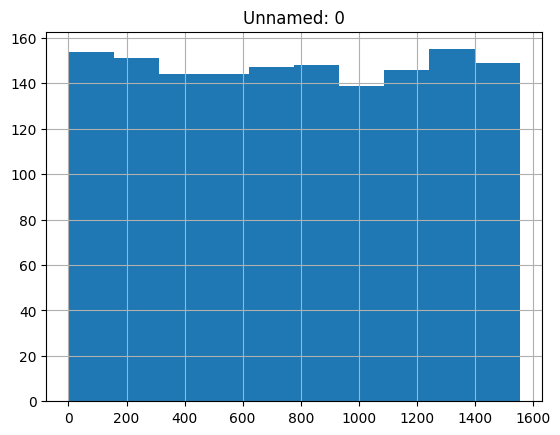

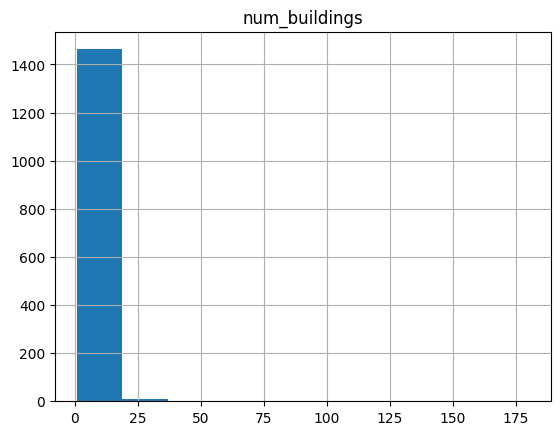

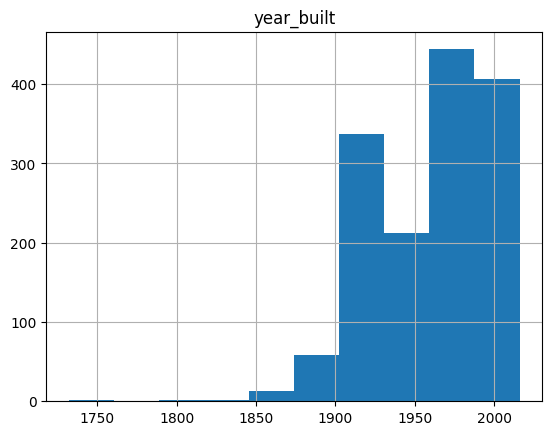

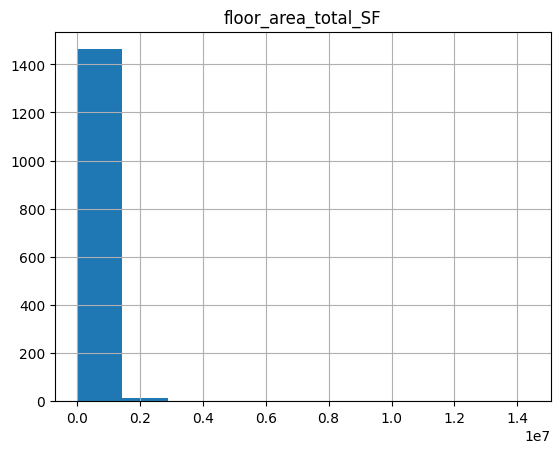

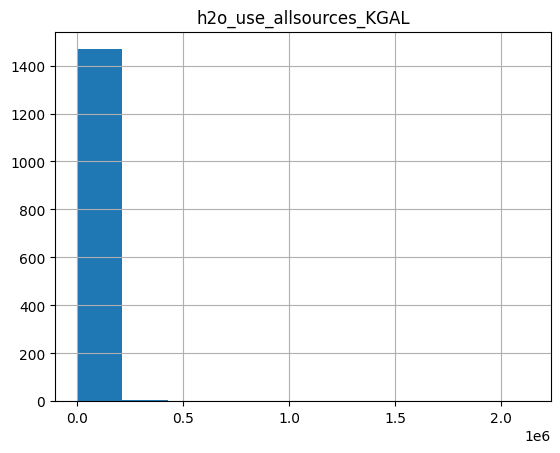

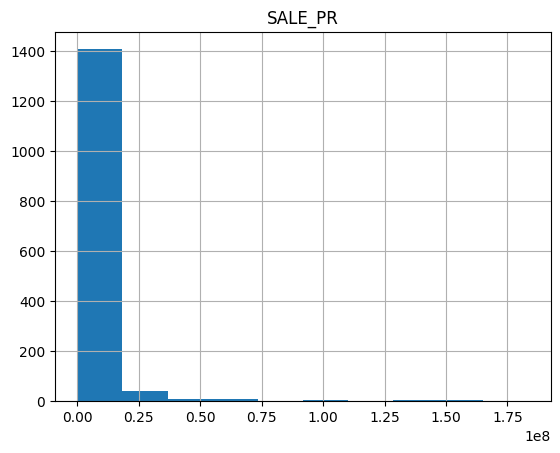

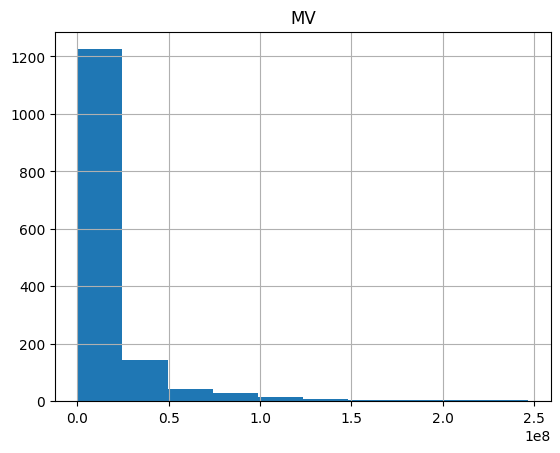

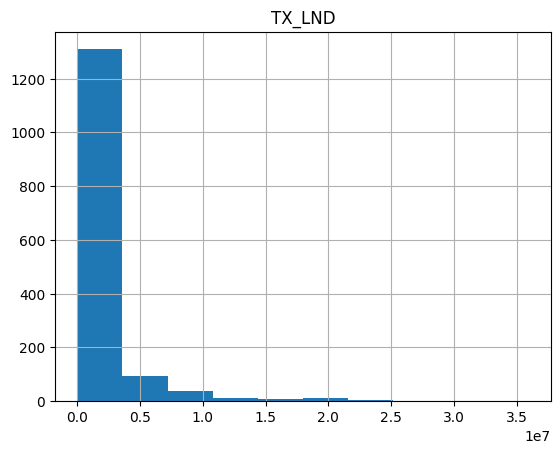

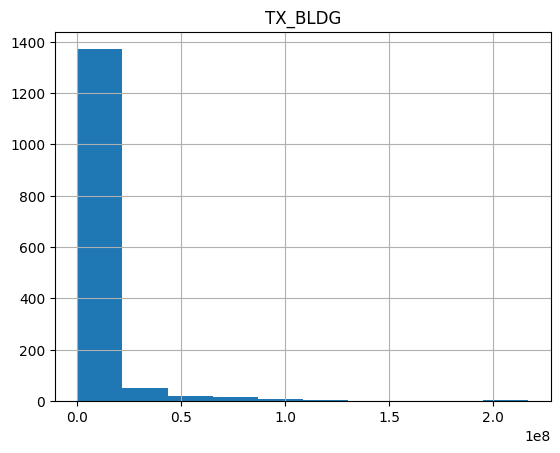

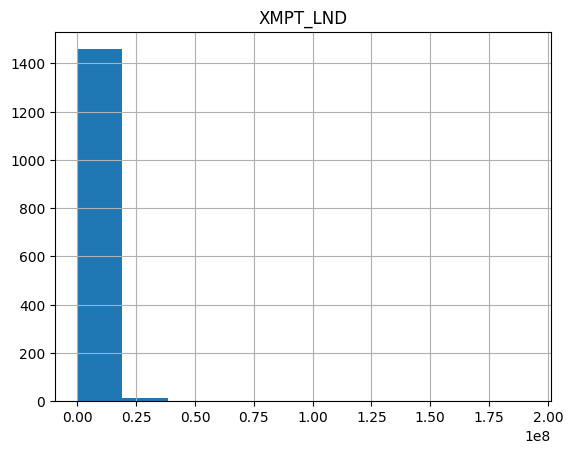

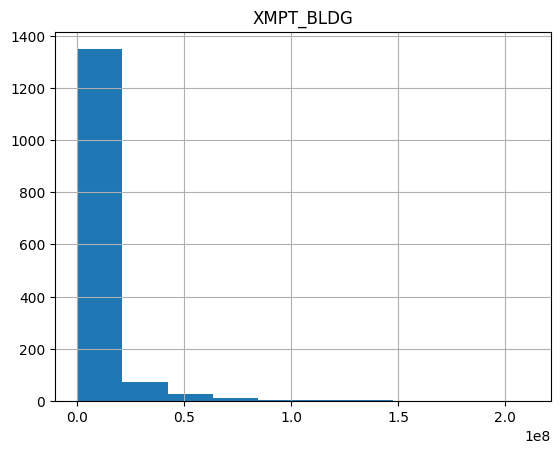

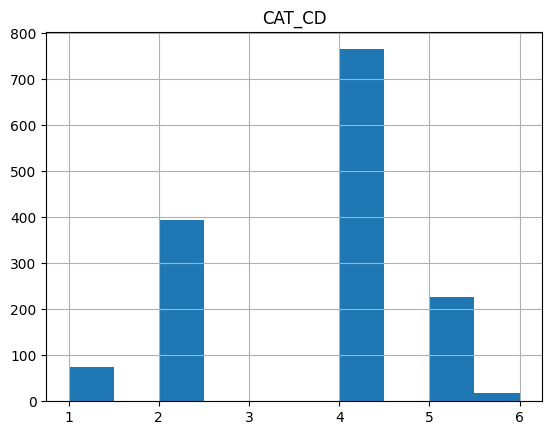

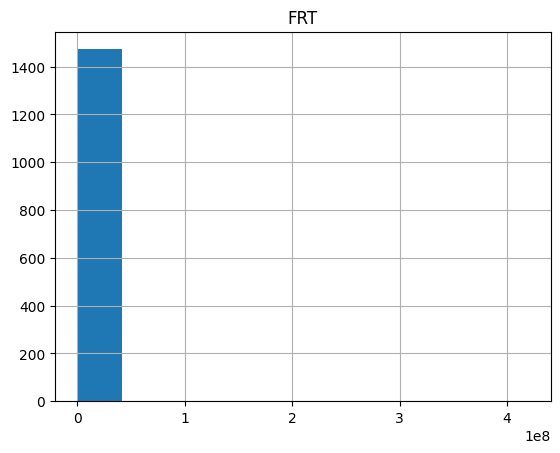

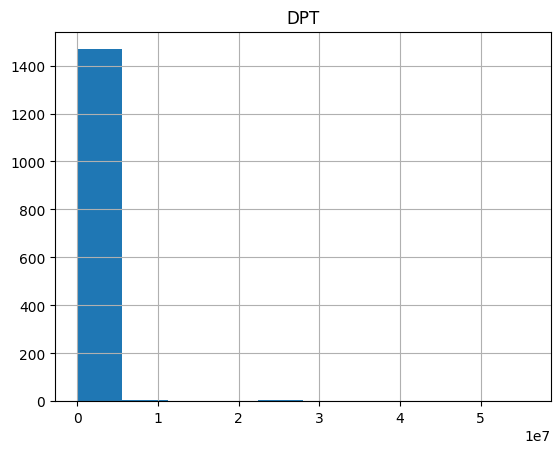

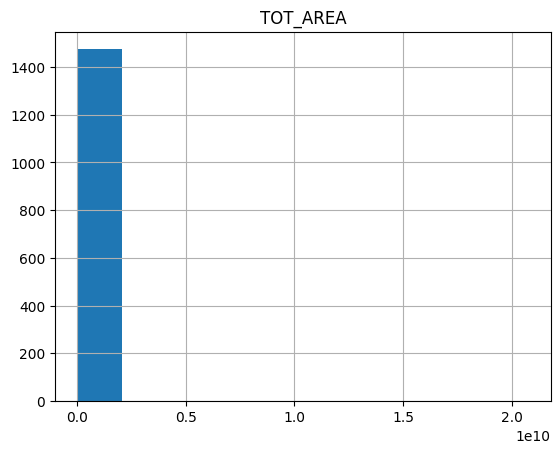

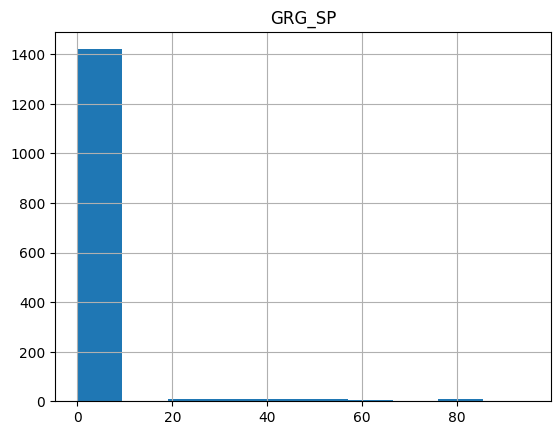

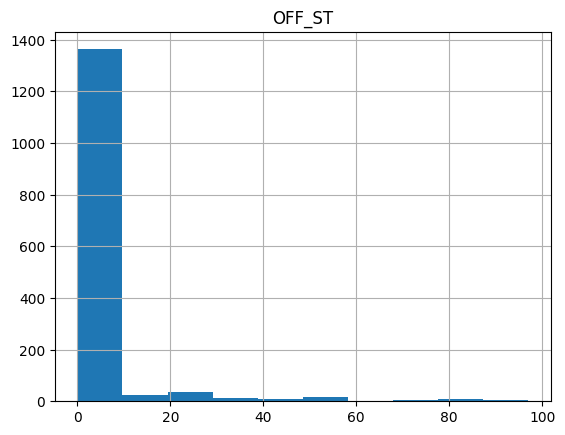

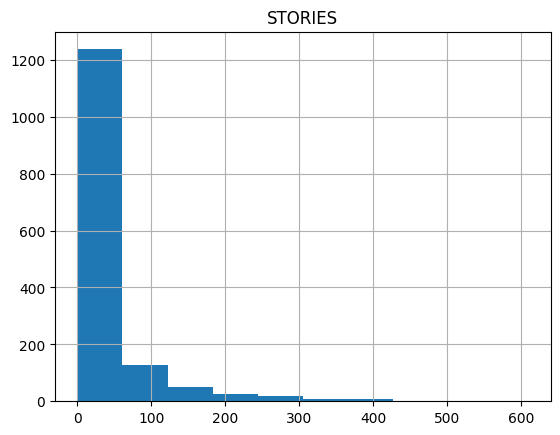

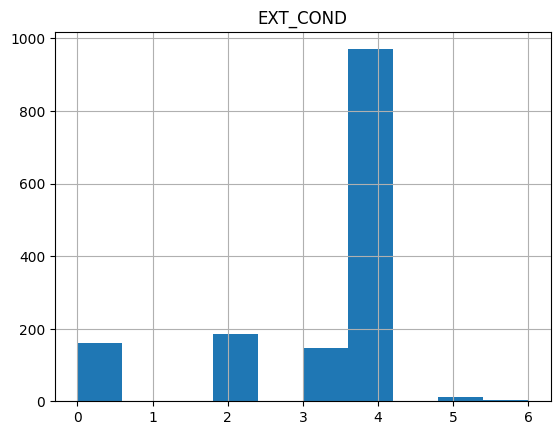

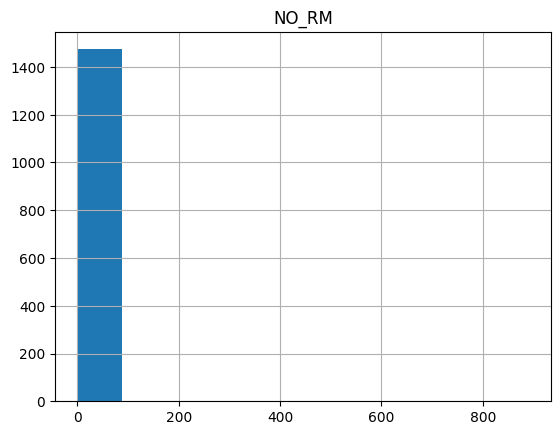

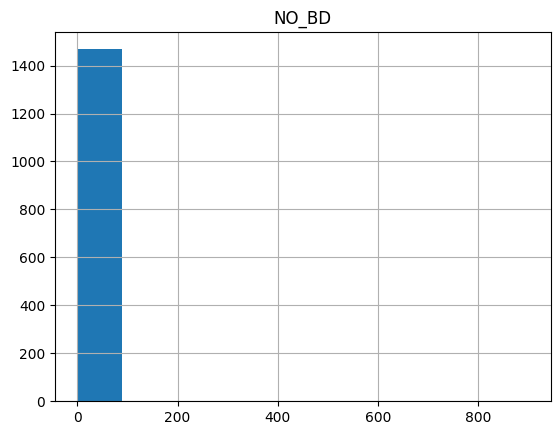

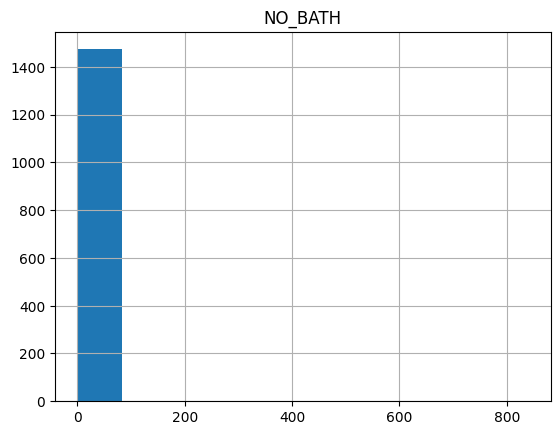

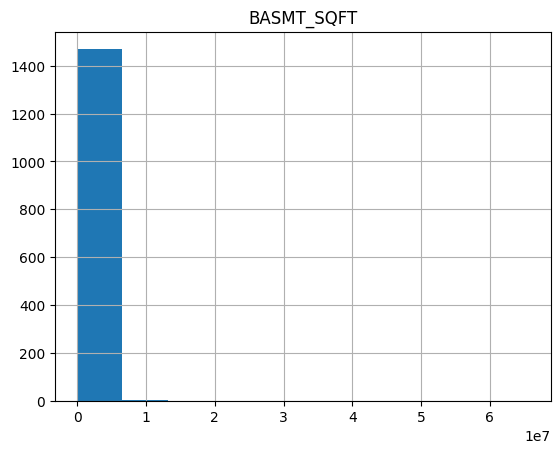

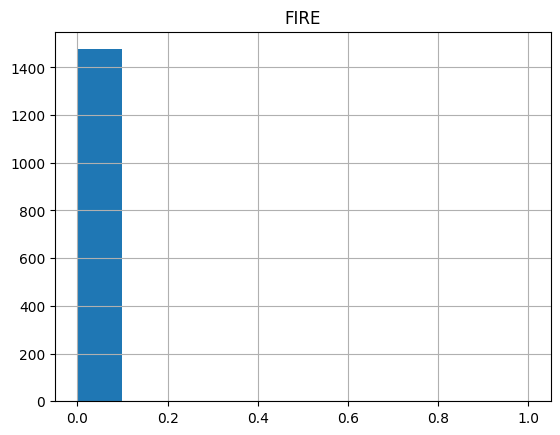

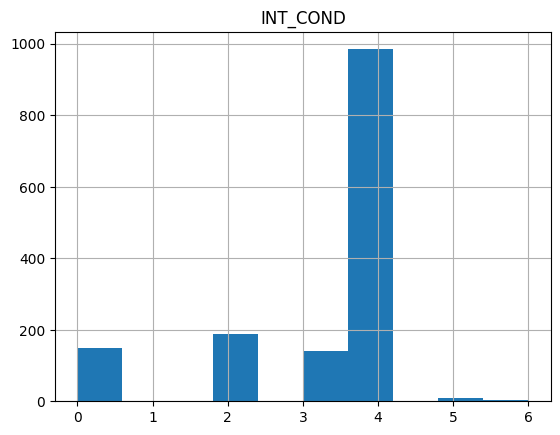

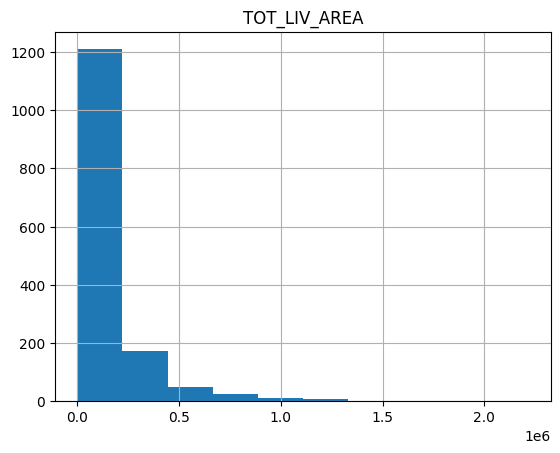

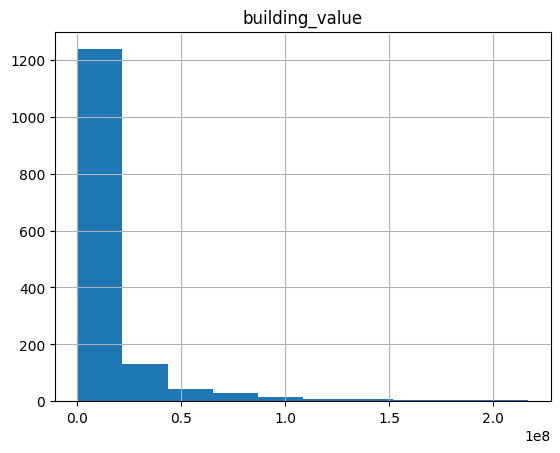

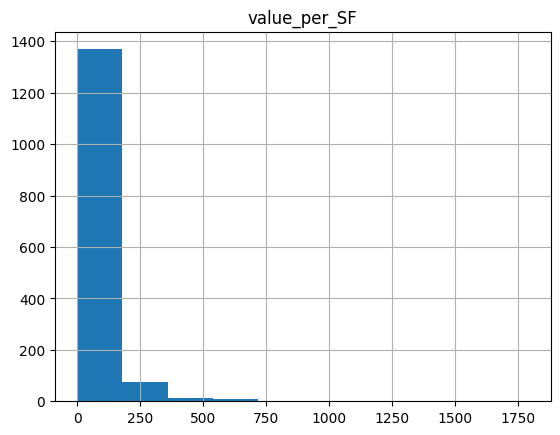

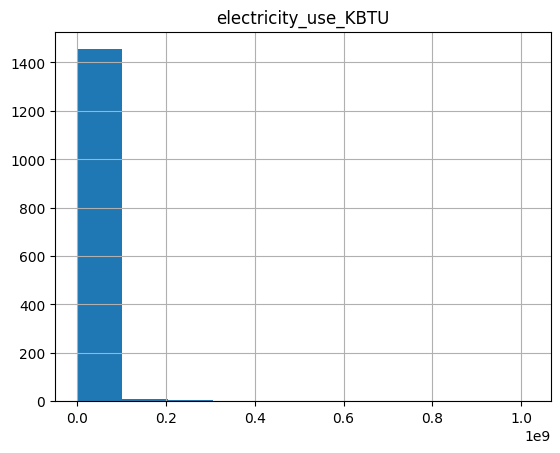

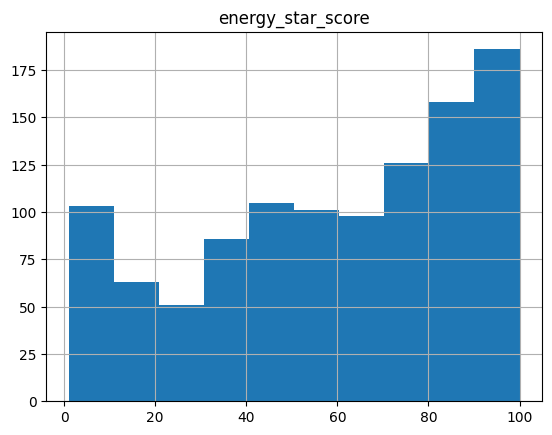

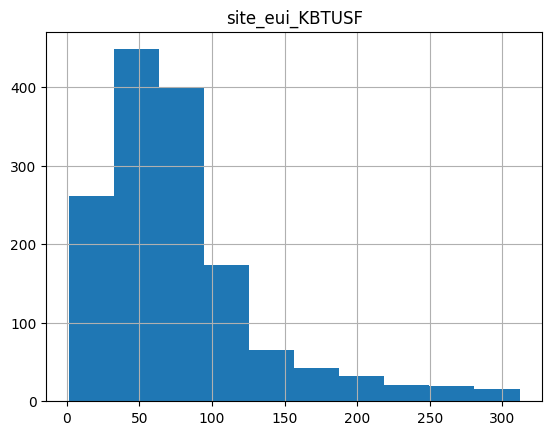

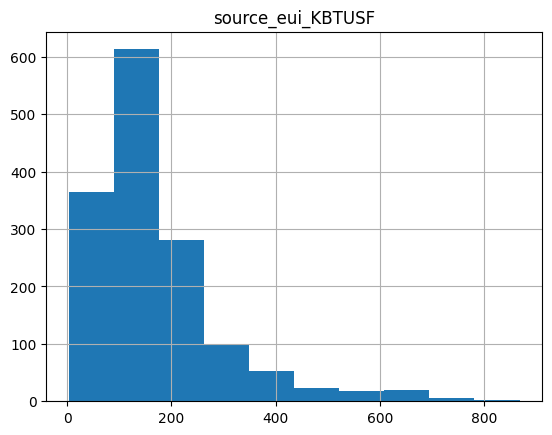

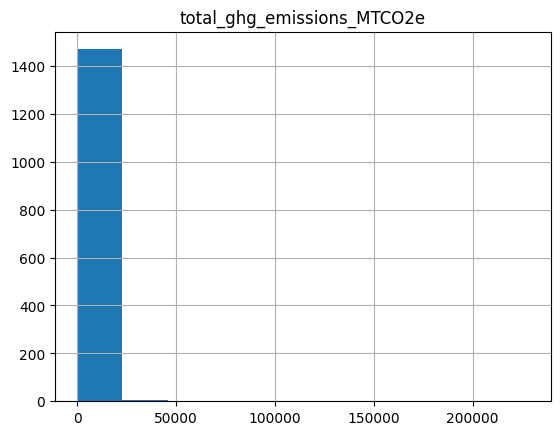

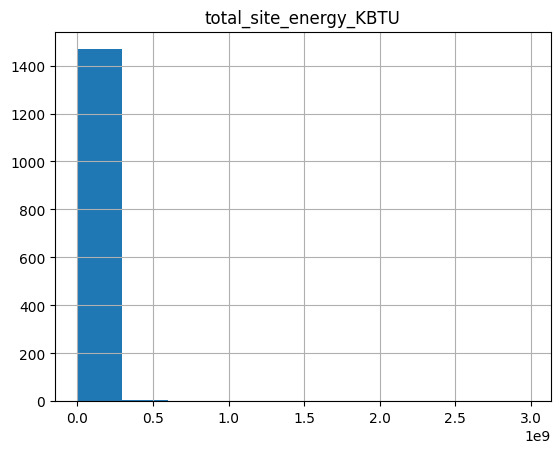

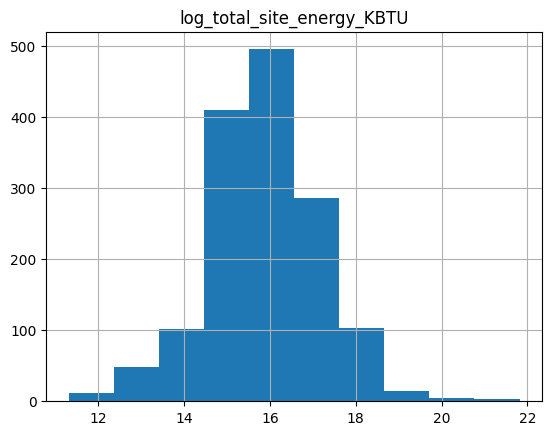

In [ ]:
#create histogram
for c in Philly.select_dtypes("number").columns:

  Philly[[c]].hist()

In [ ]:
#check for missing values
Philly.isna().sum()

,0
Unnamed: 0,0
num_buildings,0
year_built,0
property_type_primary_epa,0
floor_area_total_SF,0
h2o_use_allsources_KGAL,0
SALE_PR,0
SALE_TY,0
MV,0
TX_LND,0


<Axes: >

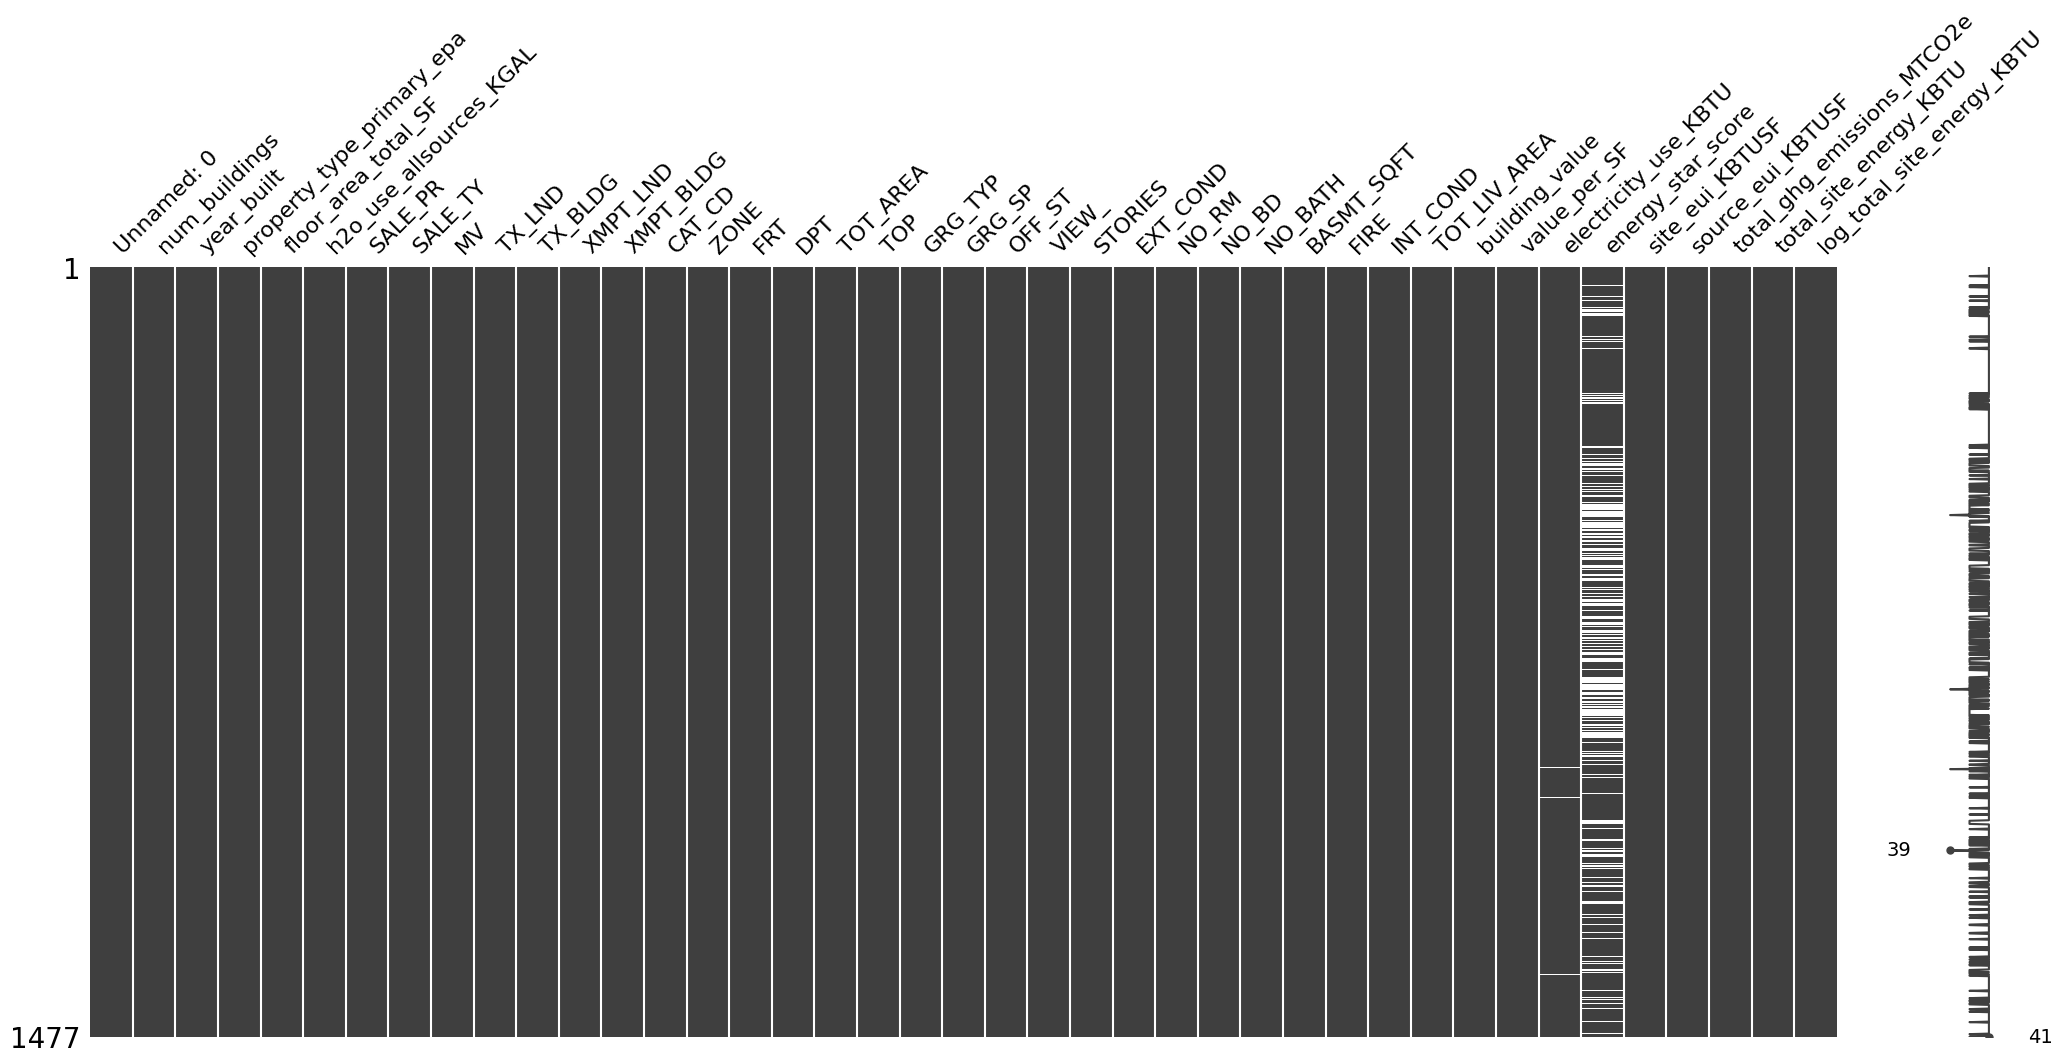

In [ ]:
#visuliase the missing value in Philly
msno.matrix(Philly)

This matrix shows that only two columns have missing values energy star score and electricity use ktbu

In [ ]:
# summarize the number of rows with missing values for each column
for c in Philly.columns:

  # count number of rows with missing values
  n_miss = Philly[c].isnull().sum()
  perc = n_miss / Philly.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, Philly[c].dtype,
                                                  n_miss, perc))

Unnamed: 0 (int64):  Missing: 0 (0.0%)
num_buildings (int64):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
property_type_primary_epa (object):  Missing: 0 (0.0%)
floor_area_total_SF (float64):  Missing: 0 (0.0%)
h2o_use_allsources_KGAL (float64):  Missing: 0 (0.0%)
SALE_PR (float64):  Missing: 0 (0.0%)
SALE_TY (object):  Missing: 0 (0.0%)
MV (float64):  Missing: 0 (0.0%)
TX_LND (float64):  Missing: 0 (0.0%)
TX_BLDG (float64):  Missing: 0 (0.0%)
XMPT_LND (float64):  Missing: 0 (0.0%)
XMPT_BLDG (float64):  Missing: 0 (0.0%)
CAT_CD (int64):  Missing: 0 (0.0%)
ZONE (object):  Missing: 0 (0.0%)
FRT (float64):  Missing: 0 (0.0%)
DPT (int64):  Missing: 0 (0.0%)
TOT_AREA (float64):  Missing: 0 (0.0%)
TOP (object):  Missing: 0 (0.0%)
GRG_TYP (object):  Missing: 0 (0.0%)
GRG_SP (int64):  Missing: 0 (0.0%)
OFF_ST (int64):  Missing: 0 (0.0%)
VIEW_ (object):  Missing: 0 (0.0%)
STORIES (int64):  Missing: 0 (0.0%)
EXT_COND (int64):  Missing: 0 (0.0%)
NO_RM (int64):  Missing: 0 (0.0%)
NO_

No variable has more than 40 percent missing values so keep all of them

In [ ]:
for c in Philly.columns:
    # count number of rows with missing values
    n_miss = Philly[c].isnull().sum()
    perc = n_miss / Philly.shape[0] * 100

    # If more than 40% missing, drop the column
    if perc > 40:
        Philly.drop(c, axis=1, inplace=True)

# Print the final shape of the DataFrame after columns are dropped
print("there are (rows, columns) = ", Philly.shape, "in the dataframe")

there are (rows, columns) =  (1477, 41) in the dataframe


In [ ]:
#drop columns with no relevance to energy
columns_to_drop = [
    'num_buildings',
    'SALE_PR',
    'SALE_TY',
    'MV',
    'TX_LND',
    'TOT_LIV_AREA',
    'log_total_site_energy_kbt',
    'building_value',
    'value_per_sf',
    'energy_star_score',
    'source_eui_kbtusf',
    'total_ghg_emissions_mtco2e',
    'total_site_energy_kbt'
]

# Check if all columns to be dropped exist in the DataFrame
missing_columns = [col for col in columns_to_drop if col not in Philly.columns]

# If there are missing columns, print them and drop only the existing ones
if missing_columns:
    print(f"Warning: The following columns are not in the DataFrame and will be skipped: {missing_columns}")
    columns_to_drop = [col for col in columns_to_drop if col in Philly.columns]

# Drop the columns that exist in the DataFrame
Philly = Philly.drop(columns=columns_to_drop)

# Verify the remaining columns
print(Philly.columns)

Index(['Unnamed: 0', 'year_built', 'property_type_primary_epa',
       'floor_area_total_SF', 'h2o_use_allsources_KGAL', 'TX_BLDG', 'XMPT_LND',
       'XMPT_BLDG', 'CAT_CD', 'ZONE', 'FRT', 'DPT', 'TOT_AREA', 'TOP',
       'GRG_TYP', 'GRG_SP', 'OFF_ST', 'VIEW_', 'STORIES', 'EXT_COND', 'NO_RM',
       'NO_BD', 'NO_BATH', 'BASMT_SQFT', 'FIRE', 'INT_COND', 'value_per_SF',
       'electricity_use_KBTU', 'site_eui_KBTUSF', 'source_eui_KBTUSF',
       'total_ghg_emissions_MTCO2e', 'total_site_energy_KBTU',
       'log_total_site_energy_KBTU'],
      dtype='object')


In [ ]:
# List of additional columns to drop with no relevance to energy consumption
columns_to_drop = [
    'Unnamed: 0',            # Index column
    'log_total_site_energy_KBTU',  # Redundant log-transformed column
    'XMPT_LND', 'XMPT_BLDG', # Exemption status (possibly irrelevant)
    'CAT_CD', 'ZONE', 'FRT', 'DPT', 'GRG_TYP', 'OFF_ST', 'VIEW_', 'FIRE', 'INT_COND', 'EXT_COND',  # Possibly irrelevant categorical features
    'TX_BLDG',               # Potentially irrelevant textual column
    'NO_RM', 'NO_BD', 'NO_BATH',  # Room, bedroom, bathroom counts (can be dropped based on relevance)
    'property_type_primary_epa',  # If deemed irrelevant after feature importance check # Added a comma here
    'GRG_SP',
    'value_per_SF',
    'BASMT_SQFT',
    'source_eui_KBTUSF',
    'total_site_energy_KBTU',
    'total_ghg_emissions_MTCO2e',
]

# Drop the specified columns from the DataFrame
Philly = Philly.drop(columns=columns_to_drop, errors='ignore') # Added errors='ignore' to skip non-existent columns

# Check if all columns are successfully dropped
print(f"Remaining columns: {Philly.columns}")

Remaining columns: Index(['year_built', 'floor_area_total_SF', 'h2o_use_allsources_KGAL',
       'TOT_AREA', 'TOP', 'STORIES', 'electricity_use_KBTU',
       'site_eui_KBTUSF'],
      dtype='object')


In [ ]:
#show dataframe
Philly.head ()

,year_built,floor_area_total_SF,h2o_use_allsources_KGAL,TOT_AREA,TOP,STORIES,electricity_use_KBTU,site_eui_KBTUSF
0,1987,1117466.0,17093.4,6478600.0,F,400,74041355.4,72.4
1,1992,1148906.0,16707.4,6443100.0,F,0,70118783.7,64.4
2,1986,751503.0,11007.6,3528000.0,F,290,37377709.4,70.7
3,1981,721408.0,3428.9,3600000.0,A,270,37120444.6,62.8
4,1973,1178691.0,17363.1,3537600.0,F,400,32611646.9,52.3


In [ ]:
#nan values in dataframe variable site
Philly["site_eui_KBTUSF"].isna().sum()

0

In [ ]:
original_len = Philly.shape[0]
Philly.dropna(subset=['site_eui_KBTUSF'],how='any', inplace=True)

print("I lost {:.2f}% of the data".format((1 - (Philly.shape[0] / original_len)) * 100))

I lost 0.00% of the data


In [ ]:
# Apply log transformation to skewed features
# handle 0 values by adding a small constant, e.g., 1e-5
Philly['log_electricity_use_KBTU'] = np.log(Philly['electricity_use_KBTU'] + 1e-5)
Philly['log_floor_area_total_SF'] = np.log(Philly['floor_area_total_SF'] + 1e-5)
Philly['log_h2o_use_allsources_KGAL'] = np.log(Philly['h2o_use_allsources_KGAL'] + 1e-5)
Philly['log_TOT_AREA'] = np.log(Philly['TOT_AREA'] + 1e-5)

In [ ]:
# Drop the original features
columns_to_drop = ['electricity_use_KBTU', 'floor_area_total_SF', 'h2o_use_allsources_KGAL', 'TOT_AREA']
Philly_log = Philly.drop(columns=columns_to_drop, axis=1)

In [ ]:
Philly_log. head ()

,year_built,TOP,STORIES,site_eui_KBTUSF,log_electricity_use_KBTU,log_floor_area_total_SF,log_h2o_use_allsources_KGAL,log_TOT_AREA
0,1987,F,400,72.4,18.120134,13.926574,9.746448,15.684015
1,1992,F,0,64.4,18.065701,13.954321,9.723607,15.678520
2,1986,F,290,70.7,17.436585,13.529830,9.306341,15.076242
3,1981,A,270,62.8,17.429678,13.488960,8.139995,15.096444
4,1973,F,400,52.3,17.300180,13.979915,9.762103,15.078959


In [ ]:
# isolate the target variable first in Philly (endogenous)
y = Philly_log['site_eui_KBTUSF']  # Target variable

# and the input variables (exogenous)
X = Philly_log.drop('site_eui_KBTUSF', axis=1)

In [ ]:
y.shape

(1477,)

In [ ]:
X.shape

(1477, 7)

In [ ]:
# # Define the numerical_features and categorical_features lists
# numerical_features = ['year_built','log_electricity_use_KBTU', 'log_floor_area_total_SF',
#                       'log_h2o_use_allsources_KGAL', 'log_TOT_AREA']  # Add your numerical features here

# categorical_features = [col for col in Philly_log.columns
#                        if col not in numerical_features and col != 'site_eui_KBTUSF']  # Exclude target variable

In [ ]:
#separate categorical and numerical values
X_numeric_p = Philly_log[numerical_features]
X_categorical_p = Philly_log[categorical_features]

In [ ]:
X_numeric_p.shape

(1477, 5)

In [ ]:
X_categorical_p.shape

(1477, 2)

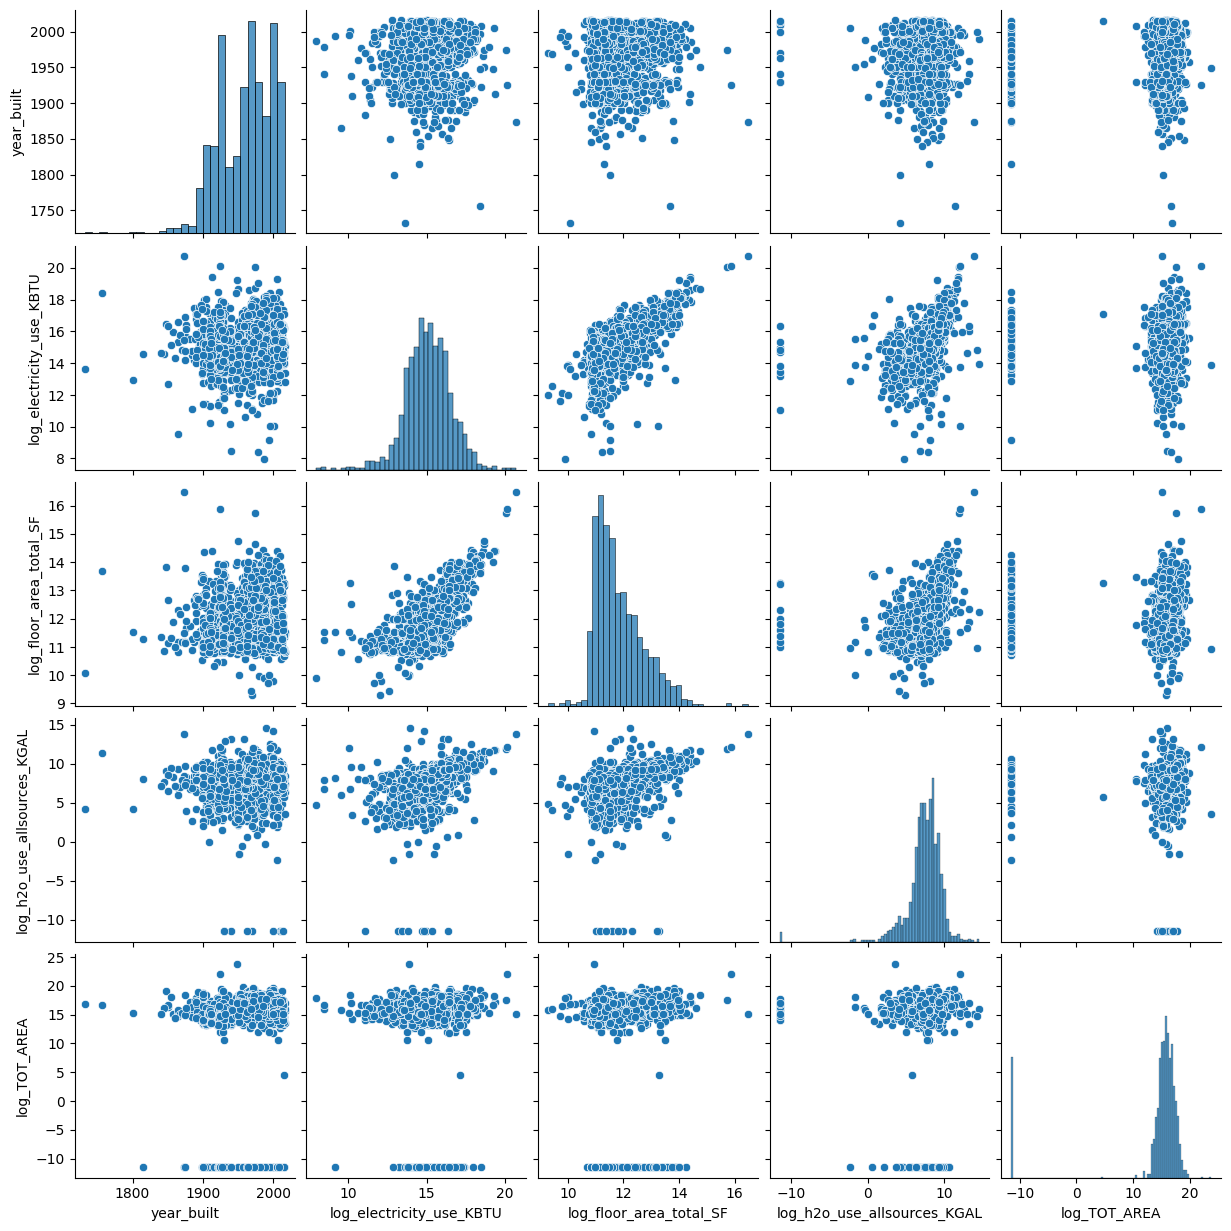

In [ ]:
import seaborn as sns
#MAKE SCATTER PLOT TO SEE COVARIANCE
sns.pairplot(X_numeric_p)

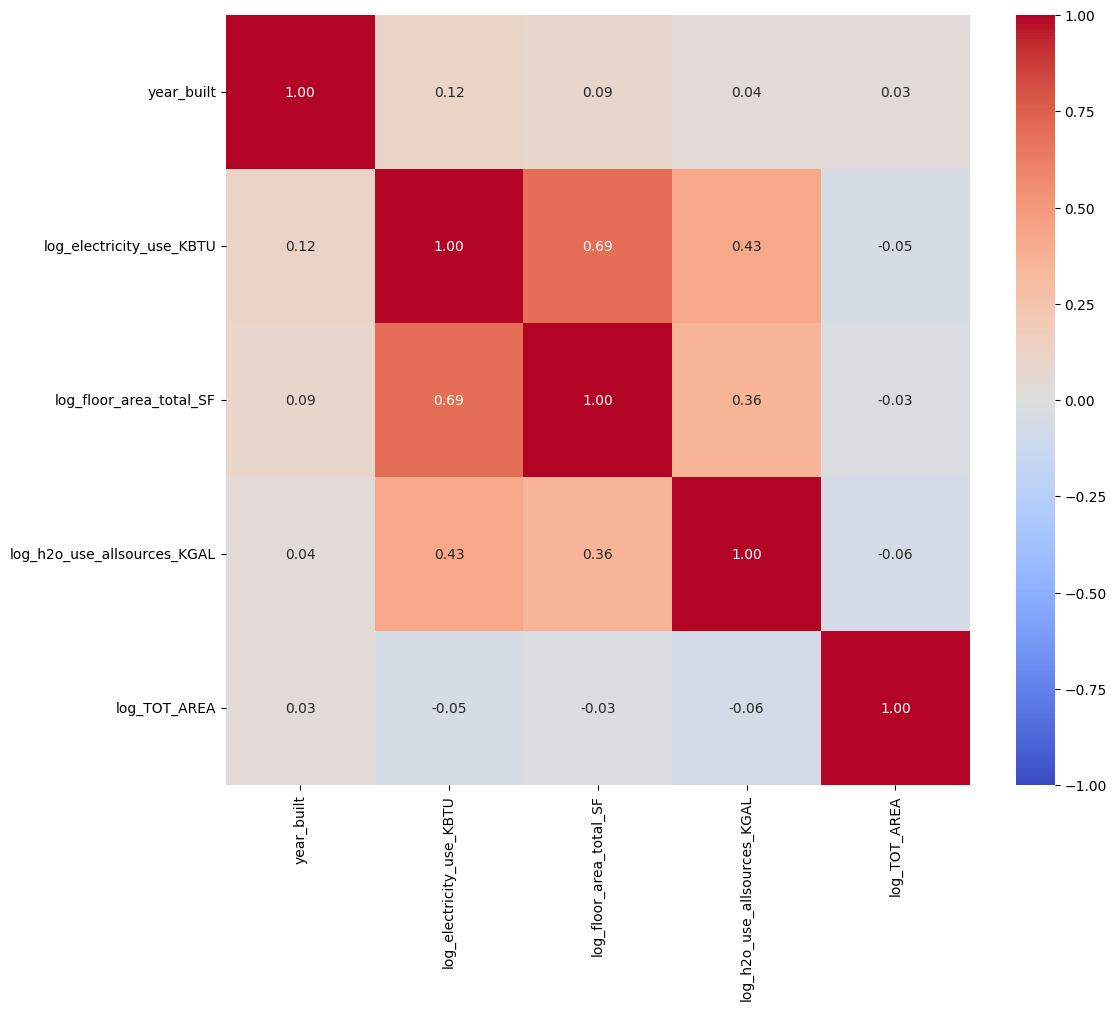

In [ ]:
# Compute the correlation matrix of the numeric data
corr_matrix = X_numeric_p.corr()

# Set a threshold for considering variables to be collinear (e.g., above 0.9)
threshold = 0.9

# Find highly correlated pairs of variables (excluding self-correlations)
collinear_pairs = np.where(np.abs(corr_matrix) > threshold)
collinear_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*collinear_pairs) if x != y]

# Print the collinear variable pairs
for pair in collinear_pairs:
    print(f"Collinear variables: {pair[0]} and {pair[1]}")

# Optionally, visualize the correlation matrix to spot collinear variables
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1)
plt.show()

log_electricity_use_KBTU vs. log_floor_area_total_SF:

Correlation: 0.69. This is a strong positive correlation, indicating that as the total floor area of a building increases, its electricity use also tends to increase significantly, even in the log-transformed scale.
log_electricity_use_KBTU vs. log_h2o_use_allsources_KGAL:

Correlation: 0.43. There's a moderate positive correlation between electricity use and water use. Buildings that consume more electricity tend to use more water, which could indicate energy-intensive buildings also require significant water resources.

In [ ]:
X_categorical_p.head ()

,TOP,STORIES
0,F,400
1,F,0
2,F,290
3,A,270
4,F,400


In [ ]:
X_numeric_p. head ()

,year_built,log_electricity_use_KBTU,log_floor_area_total_SF,log_h2o_use_allsources_KGAL,log_TOT_AREA
0,1987,18.120134,13.926574,9.746448,15.684015
1,1992,18.065701,13.954321,9.723607,15.678520
2,1986,17.436585,13.529830,9.306341,15.076242
3,1981,17.429678,13.488960,8.139995,15.096444
4,1973,17.300180,13.979915,9.762103,15.078959


In [ ]:
# this does not have to be identical to my output as you may have dropped different variables
print("there are (rows, columns) = ", X_numeric_p.shape, "in the numerical variables")

there are (rows, columns) =  (1477, 5) in the numerical variables


In [ ]:
# note: recheck missing values
# this is important: after I apply the log function to some variables cause log(0) = -infinity
print("there are {} missing or infinity values in the numerical data".format(X_numeric_p.isnull().sum().sum()))

there are 9 missing or infinity values in the numerical data


In [ ]:
from sklearn.impute import KNNImputer

# Replace -inf or NaN in numerical data (if applicable)
X_numeric_p.replace([np.inf, -np.inf], np.nan, inplace=True)

# Initialize KNNImputer for numerical data
knn_imputer = KNNImputer(n_neighbors=5)
X_numeric_imputed = knn_imputer.fit_transform(X_numeric_p)

<ipython-input-545-ceed2b6bb8e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numeric_p.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity
X_categorical_encoded = one_hot_encoder.fit_transform(X_categorical_p)

In [ ]:
X_numeric_imputed.shape

(1477, 5)

In [ ]:
X_categorical_encoded.shape

(1477, 42)

In [ ]:
Xcom= np.hstack([X_numeric_imputed, X_categorical_encoded])
Xcom.shape

(1477, 47)

In [ ]:
Xcom

array([[1987.        ,   18.12013435,   13.92657418, ...,    0.        ,
           0.        ,    0.        ],
       [1992.        ,   18.06570127,   13.95432074, ...,    0.        ,
           0.        ,    0.        ],
       [1986.        ,   17.43658508,   13.52983048, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [1931.        ,   14.64528011,   11.68642489, ...,    0.        ,
           0.        ,    0.        ],
       [1959.        ,   16.36511501,   12.35449265, ...,    0.        ,
           0.        ,    0.        ],
       [2010.        ,   16.43653239,   13.00374424, ...,    0.        ,
           0.        ,    0.        ]])

In [ ]:
print("The dataset has {} features (!!!)".format(Xcom.shape[1]))

The dataset has 47 features (!!!)


In [ ]:
print(f"Shape of X_cleaned: {Xcom.shape}")
print(f"Shape of y: {y.shape}")

Shape of X_cleaned: (1477, 47)
Shape of y: (1477,)


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(Xcom, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1181, 47)
Test set shape: (296, 47)


In [ ]:
#Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1407.8244501182432
R-squared: 0.6224992878438111


In [ ]:
#this is how you see the importance of the features
rf_regressor.feature_importances_[:10]

array([0.06138183, 0.44009062, 0.24932819, 0.12869157, 0.07296539,
       0.00143229, 0.00996652, 0.        , 0.00364674, 0.004209  ])

In [ ]:
feature_names = 'year_built', 'floor_area_total_SF', 'h2o_use_allsources_KGAL', 'TOT_AREA', 'electricity_use_KBTU', 'TOP_F', 'STORIES_10', 'STORIES_15', 'STORIES_20', 'STORIES_30', 'STORIES_40', 'STORIES_50', 'STORIES_60', 'STORIES_70', 'STORIES_80', 'STORIES_90', 'STORIES_100', 'STORIES_110', 'STORIES_120', 'STORIES_130', 'STORIES_140', 'STORIES_150', 'STORIES_160', 'STORIES_170', 'STORIES_180', 'STORIES_190', 'STORIES_200', 'STORIES_210', 'STORIES_220', 'STORIES_240', 'STORIES_250', 'STORIES_260', 'STORIES_270', 'STORIES_290', 'STORIES_300', 'STORIES_320', 'STORIES_330', 'STORIES_340', 'STORIES_360', 'STORIES_370', 'STORIES_390', 'STORIES_400', 'STORIES_420', 'STORIES_430', 'STORIES_450', 'STORIES_540', 'STORIES_610'
len(feature_names)

47

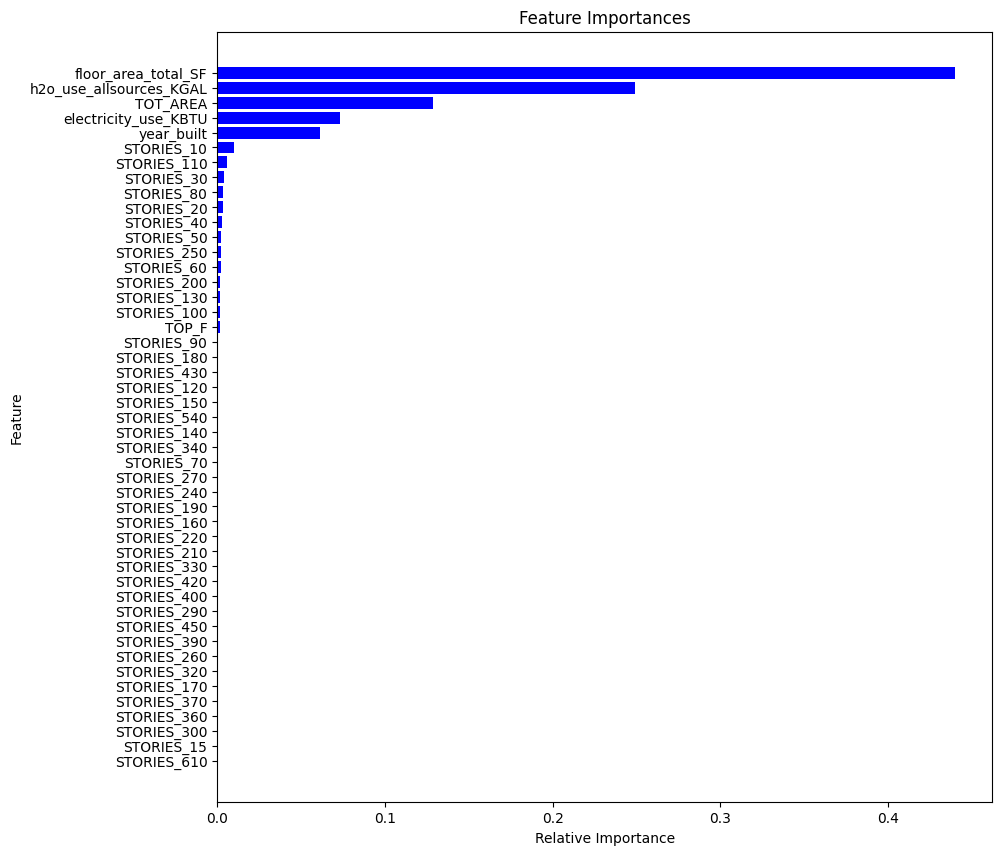

In [ ]:
# Replace with your actual feature names list:
feature_names = ['year_built', 'floor_area_total_SF', 'h2o_use_allsources_KGAL', 'TOT_AREA', 'electricity_use_KBTU', 'TOP_F', 'STORIES_10', 'STORIES_15', 'STORIES_20', 'STORIES_30', 'STORIES_40', 'STORIES_50', 'STORIES_60', 'STORIES_70', 'STORIES_80', 'STORIES_90', 'STORIES_100', 'STORIES_110', 'STORIES_120', 'STORIES_130', 'STORIES_140', 'STORIES_150', 'STORIES_160', 'STORIES_170', 'STORIES_180', 'STORIES_190', 'STORIES_200', 'STORIES_210', 'STORIES_220', 'STORIES_240', 'STORIES_250', 'STORIES_260', 'STORIES_270', 'STORIES_290', 'STORIES_300', 'STORIES_320', 'STORIES_330', 'STORIES_340', 'STORIES_360', 'STORIES_370', 'STORIES_390', 'STORIES_400', 'STORIES_420', 'STORIES_430', 'STORIES_450', 'STORIES_540', 'STORIES_610']

# Use 'rf_regressor' instead of 'model' to access feature importances
importances = rf_regressor.feature_importances_

# Get the number of features in your dataset
num_features = len(feature_names)

# Get the indices of the top features (up to the number of features in your dataset)
# using min to ensure we don't try to select more features than available
num_top_features = min(50, num_features)
indices = np.argsort(importances)[-num_top_features:]

# Create a bar plot
plt.figure(figsize=(10, 10))

# Use num_top_features instead of 50 to match the number of features
plt.barh(range(num_top_features), importances[indices], color='b', align='center')
plt.yticks(range(num_top_features), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Model Performance

The Random Forest Regressor model achieved a decent R-squared value of 62percent. This indicates that the model is able to explain a good portion of the variance in the target variable (site_eui_KBTUSF).


Model Focus: The model appears to rely heavily on h2o_use_allsources_KGAL and floor_area_total_SF to make predictions. This suggests that these factors are strong predictors of the target variable.

Number of Stories: The number of stories is correlated to the building's size and energy usage, thus its inclusion is expected.
Year Built: The year in which the building was built is also important, which can indicate the types of building materials and energy systems used, influencing overall energy usage.
Interesting Observations

The model suggests that electricity use, floor area, water usage, and the number of stories are highly predictive of a building's energy consumption. This information can be useful for prioritizing strategies to improve energy efficiency.


# TASK 6 London


In [ ]:
#show London data frame
london. head ()

,RRN,RELATED_RRN,ISSUE_DATE,ORGANISATION_NAME,ADDR1,ADDR2,ADDR3,ADDR4,POST_TOWN,COUNTY_OSGB,...,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,TYPICALENERGYUSEFUELTHERMAL,TYPICALENERGYUSEELECTRICAL,RENEWABLESTHERMAL,RENEWABLESELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL,TYPICAL_ANNUAL_HEAT_TOTAL,TYPICAL_ANNUAL_ELEC_TOTAL
0,0793-0110-4549-4309-1096,NaN,11/3/10,Hackney Community College,C BLOCK,Hackney Community College,Falkirk Street,NaN,LONDON,Greater London Authority,...,113,106,237,80,0.0,0.0,140233.0,131546.0,294117.0,99280.0
1,9090-1984-0130-1780-7004,NaN,11/3/10,Mandeville School,NaN,Mandeville School,Horsenden Lane North,NaN,GREENFORD,Greater London Authority,...,178,75,225,56,0.0,0.0,447136.0,188400.0,565200.0,140672.0
2,9770-1059-0907-0690-7901,NaN,11/3/10,St. Mary's RC Junior School,NaN,St. Mary's RC Junior School,Sydenham Road,NaN,CROYDON,Greater London Authority,...,195,47,251,62,0.0,0.0,303225.0,73085.0,390305.0,96410.0
3,0770-0210-5879-1709-4096,NaN,11/3/10,St. Marys Catholic Infant School,NaN,St. Marys Catholic Infant School,Bedford Park,NaN,CROYDON,Greater London Authority,...,225,53,148,40,0.0,0.0,293130.0,69048.4,192814.4,52112.0
4,0210-9908-0180-7890-3050,0210-9908-0280-7490-3054,11/2/10,Haringey NHS Trust,NaN,Haringey NHS Trust,"Hornsey Central Surgery, 151 Park Road",NaN,LONDON,Greater London Authority,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#desribe data and missing values in London
describe = london.describe().T
zero_val_cnt = (london == 0).sum()
describe['zero_val %'] = (zero_val_cnt / london.shape[0])*100
describe['missing %'] = 100 - (describe['count'] / london.shape[0])*100
describe.style.format("{:.3f}")

,count,mean,std,min,25%,50%,75%,max,zero_val %,missing %
ENERGY_RATING,25118.000,588.321,2139.641,-1.000,78.000,97.000,122.000,9999.000,0.299,0.000
TOTAL_CO2_EMISSIONS,25118.000,310.257,981.166,0.000,74.000,123.000,260.000,46222.000,4.574,0.000
FLOOR_AREA,25118.000,3446.070,6387.539,1.000,1321.000,1911.000,3391.830,280912.000,0.000,0.000
ANNUALENERGYUSEFUELTHERMAL,25118.000,175.495,171.691,0.000,103.000,144.000,203.000,8542.000,6.139,0.000
ANNUALENERGYUSEELECTRICAL,25118.000,76.489,94.903,0.000,40.000,57.000,92.000,10559.000,4.750,0.000
TYPICALENERGYUSEFUELTHERMAL,25118.000,211.223,146.327,0.000,148.000,164.000,235.000,1487.000,5.685,0.000
TYPICALENERGYUSEELECTRICAL,25118.000,64.350,39.423,0.000,40.000,49.000,83.000,344.000,4.411,0.000
RENEWABLESTHERMAL,25118.000,0.161,2.513,0.000,0.000,0.000,0.000,90.300,99.459,0.000
RENEWABLESELECTRICAL,25118.000,0.451,4.528,0.000,0.000,0.000,0.000,100.000,98.332,0.000
ACTUAL_ANNUAL_HEAT_TOTAL,25118.000,647728.031,2214199.430,0.000,169267.500,289204.500,577590.760,140969473.000,6.139,0.000


We see that two columns have high zero values percentage renewables thermal and renewables electrical.
FLOOR_AREA shows a very wide range, suggesting potential outliers that could skew the analysis.
ENERGY_RATING contains negative values which might need to be investigated further, as energy ratings are typically positive or zero.
Several columns with zero values and wide ranges might exhibit skewed distributions.


In [ ]:
#show columns
london.columns

Index(['RRN', 'RELATED_RRN', 'ISSUE_DATE', 'ORGANISATION_NAME', 'ADDR1',
       'ADDR2', 'ADDR3', 'ADDR4', 'POST_TOWN', 'COUNTY_OSGB', 'POSTCODE',
       'ENERGY_RATING_BAND', 'ENERGY_RATING', 'TOTAL_CO2_EMISSIONS',
       'MAIN_HEATING_FUEL', 'BUILDING_ENVIRONMENT', 'FLOOR_AREA',
       'ANNUALENERGYUSEFUELTHERMAL', 'ANNUALENERGYUSEELECTRICAL',
       'TYPICALENERGYUSEFUELTHERMAL', 'TYPICALENERGYUSEELECTRICAL',
       'RENEWABLESTHERMAL', 'RENEWABLESELECTRICAL', 'ACTUAL_ANNUAL_HEAT_TOTAL',
       'ACTUAL_ANNUAL_ELEC_TOTAL', 'TYPICAL_ANNUAL_HEAT_TOTAL',
       'TYPICAL_ANNUAL_ELEC_TOTAL'],
      dtype='object')

My target variable is

'ACTUAL_ANNUAL_ELEC_TOTAL'

My FEATURES ARE:

       'ENERGY_RATING', 'TOTAL_CO2_EMISSIONS',
       'MAIN_HEATING_FUEL', 'BUILDING_ENVIRONMENT', 'FLOOR_AREA',
       'ANNUALENERGYUSEFUELTHERMAL,'RENEWABLESTHERMAL', 'RENEWABLESELECTRICAL', 'ACTUAL_ANNUAL_HEAT_TOTAL'
       

In [ ]:
#drop columns
columns_to_drop= ['RRN','RELATED_RRN',	'ISSUE_DATE',	'TYPICAL_ANNUAL_ELEC_TOTAL','ORGANISATION_NAME',	'ADDR1',	'ADDR2',	'ADDR3',	'ADDR4',	'POST_TOWN',	'COUNTY_OSGB',	'POSTCODE','RENEWABLESTHERMAL', 'RENEWABLESELECTRICAL', 'TYPICALENERGYUSEFUELTHERMAL', 'TYPICALENERGYUSEELECTRICAL', 'TYPICAL_ANNUAL_HEAT_TOTAL']

#drop columns
london.drop(columns=columns_to_drop, inplace=True, axis=1)

In [ ]:
london.head()

,ENERGY_RATING_BAND,ENERGY_RATING,TOTAL_CO2_EMISSIONS,MAIN_HEATING_FUEL,BUILDING_ENVIRONMENT,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL
0,D,89,99,Natural Gas,Heating and Mechanical Ventilation,1241.00,113,106,140233.0,131546.0
1,E,102,191,Natural Gas,Heating and Natural Ventilation,2512.00,178,75,447136.0,188400.0
2,D,77,99,Natural Gas,Heating and Natural Ventilation,1555.00,195,47,303225.0,73085.0
3,F,143,95,Natural Gas,Heating and Natural Ventilation,1302.80,225,53,293130.0,69048.4
4,G,9999,0,Natural Gas,Mixed-mode with Mechanical Ventilation,3884.07,0,0,0.0,0.0


In [ ]:
#show numerical values
london_numeric= london.select_dtypes(include=[np.number])
london_numeric.head()

,ENERGY_RATING,TOTAL_CO2_EMISSIONS,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL
0,89,99,1241.00,113,106,140233.0,131546.0
1,102,191,2512.00,178,75,447136.0,188400.0
2,77,99,1555.00,195,47,303225.0,73085.0
3,143,95,1302.80,225,53,293130.0,69048.4
4,9999,0,3884.07,0,0,0.0,0.0


In [ ]:
# Print the available columns in the DataFrame
print(london.columns)

# Assuming the column name is Total_CO2_Emissions
london.drop('TOTAL_CO2_EMISSIONS', inplace=True, axis=1)

Index(['ENERGY_RATING_BAND', 'ENERGY_RATING', 'TOTAL_CO2_EMISSIONS',
       'MAIN_HEATING_FUEL', 'BUILDING_ENVIRONMENT', 'FLOOR_AREA',
       'ANNUALENERGYUSEFUELTHERMAL', 'ANNUALENERGYUSEELECTRICAL',
       'ACTUAL_ANNUAL_HEAT_TOTAL', 'ACTUAL_ANNUAL_ELEC_TOTAL'],
      dtype='object')


In [ ]:
#check for missing values
london.isna().sum()

,0
ENERGY_RATING_BAND,0
ENERGY_RATING,0
MAIN_HEATING_FUEL,4
BUILDING_ENVIRONMENT,0
FLOOR_AREA,0
ANNUALENERGYUSEFUELTHERMAL,0
ANNUALENERGYUSEELECTRICAL,0
ACTUAL_ANNUAL_HEAT_TOTAL,0
ACTUAL_ANNUAL_ELEC_TOTAL,0


There are only four missing values in the MAIN_HEATING_FUEL column

<Axes: >

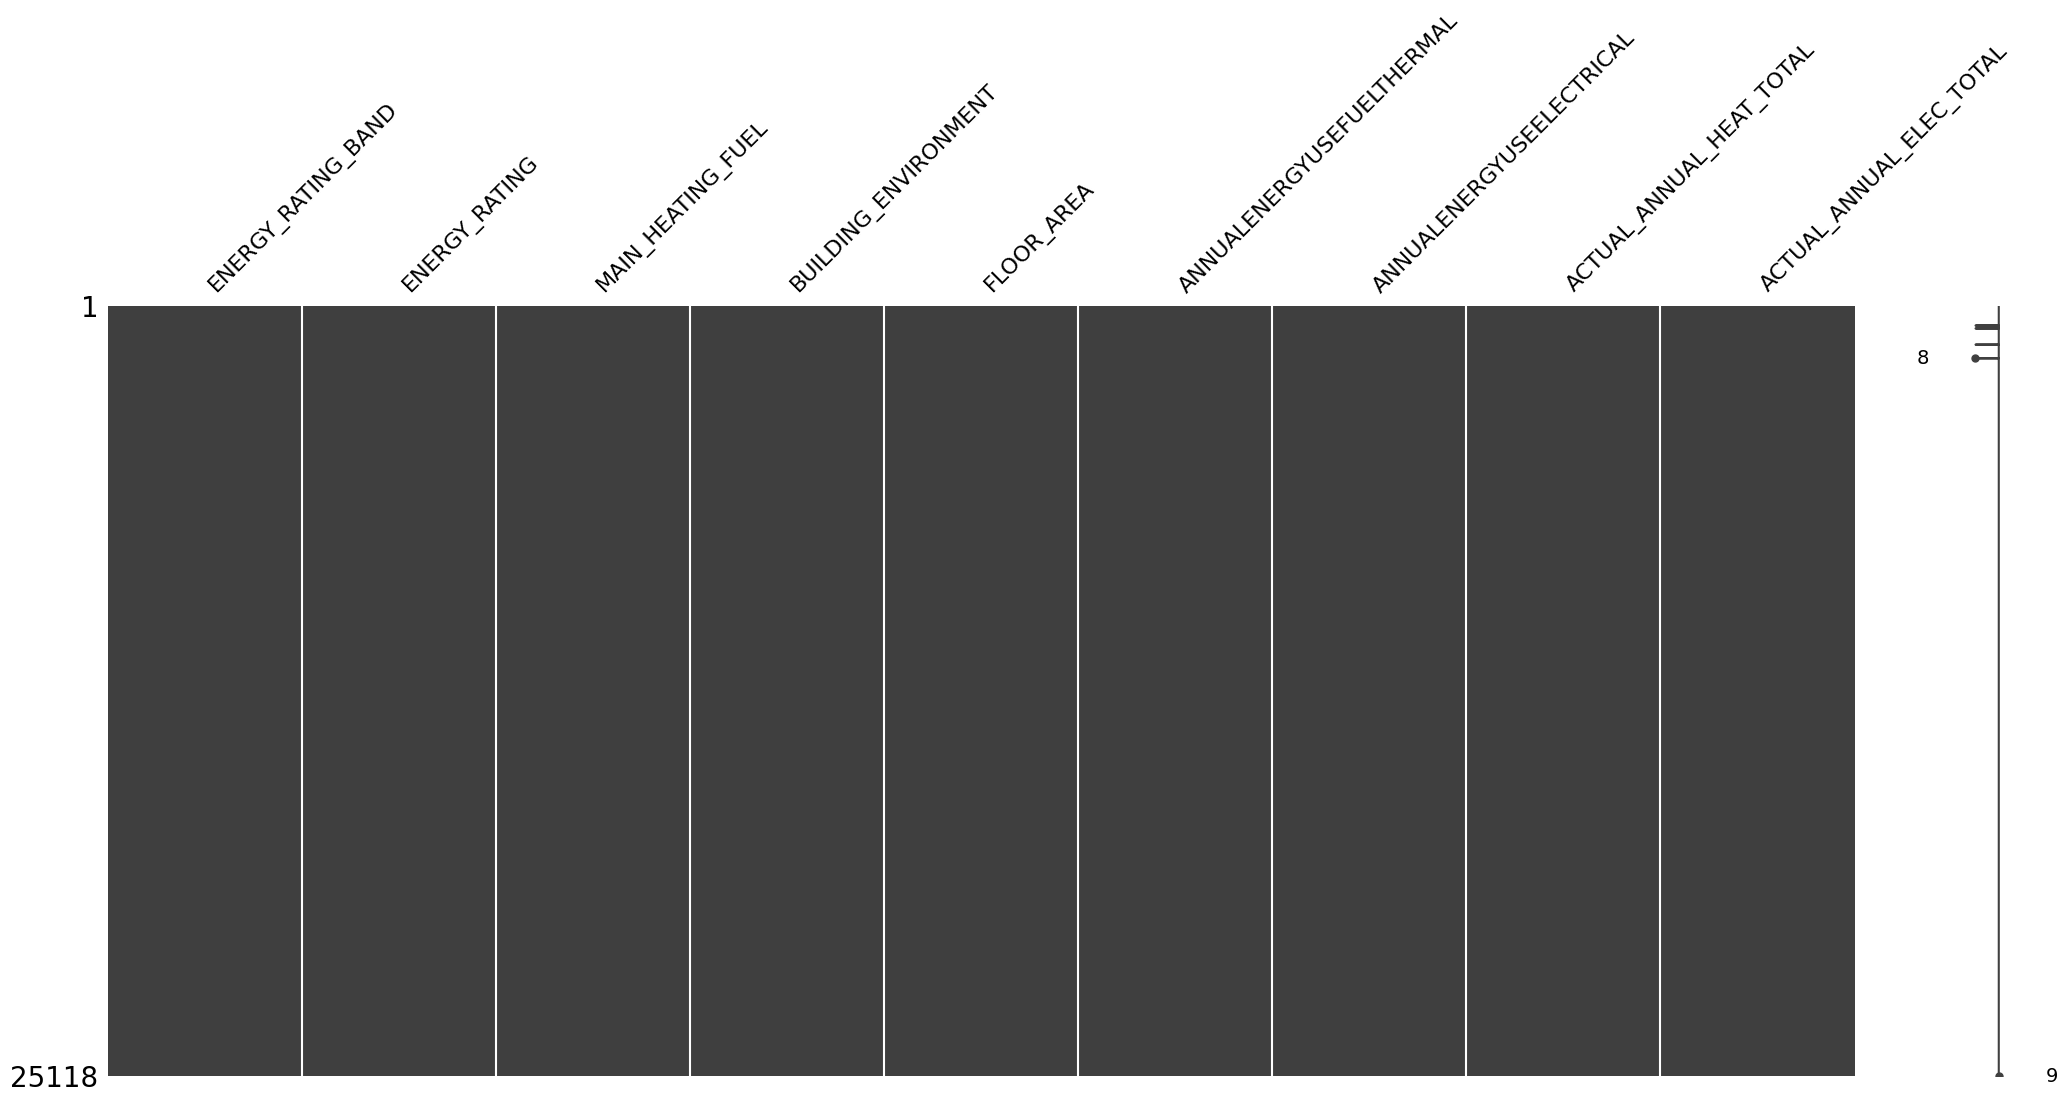

In [ ]:
#visualise missing values
msno.matrix(london)

The matrix shows that all columns in london dataframe are populated with values with the minimum column with populated values being 9 and the maximum 10.

In [ ]:
# summarize the number of rows with missing values for each column
for c in london.columns:

  # count number of rows with missing values
  n_miss = london[c].isnull().sum()
  perc = n_miss / london_numeric.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, london[c].dtype,
                                                  n_miss, perc))

ENERGY_RATING_BAND (object):  Missing: 0 (0.0%)
ENERGY_RATING (int64):  Missing: 0 (0.0%)
MAIN_HEATING_FUEL (object):  Missing: 4 (0.0%)
BUILDING_ENVIRONMENT (object):  Missing: 0 (0.0%)
FLOOR_AREA (float64):  Missing: 0 (0.0%)
ANNUALENERGYUSEFUELTHERMAL (int64):  Missing: 0 (0.0%)
ANNUALENERGYUSEELECTRICAL (int64):  Missing: 0 (0.0%)
ACTUAL_ANNUAL_HEAT_TOTAL (float64):  Missing: 0 (0.0%)
ACTUAL_ANNUAL_ELEC_TOTAL (float64):  Missing: 0 (0.0%)


In [ ]:
for c in london.columns:
    # count number of rows with missing values
    n_miss = london[c].isnull().sum()
    perc = n_miss / london.shape[0] * 100

    # If more than 40% missing, drop the column
    if perc > 40:
        london.drop(c, axis=1, inplace=True)

# Print the final shape of the DataFrame after columns are dropped
print("there are (rows, columns) = ", london_numeric.shape, "in the dataframe")

there are (rows, columns) =  (25118, 7) in the dataframe


In [ ]:
# isolate the target variable first (endogenous)
y = london['ACTUAL_ANNUAL_ELEC_TOTAL'].values

In [ ]:
# isolate the target variable first (endogenous)
x = london.drop(['ACTUAL_ANNUAL_ELEC_TOTAL'], axis=1)

In [ ]:
#separate numerical and categorical variables for further processing
X_categorical= x.select_dtypes(exclude=[np.number])
X_numeric= x.select_dtypes(include=[np.number])

In [ ]:
X_numeric.head() ## is there anything suspicious? anything thas is in fact **not** a numerical variable? that will depend on how you did in TASK 1


,ENERGY_RATING,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL
0,89,1241.00,113,106,140233.0
1,102,2512.00,178,75,447136.0
2,77,1555.00,195,47,303225.0
3,143,1302.80,225,53,293130.0
4,9999,3884.07,0,0,0.0


In [ ]:
X_numeric. describe ().T

,count,mean,std,min,25%,50%,75%,max
ENERGY_RATING,25118.0,588.320686,2.139641e+03,-1.0,78.0,97.0,122.00,9999.0
FLOOR_AREA,25118.0,3446.070203,6.387539e+03,1.0,1321.0,1911.0,3391.83,280912.0
ANNUALENERGYUSEFUELTHERMAL,25118.0,175.495063,1.716909e+02,0.0,103.0,144.0,203.00,8542.0
ANNUALENERGYUSEELECTRICAL,25118.0,76.488773,9.490307e+01,0.0,40.0,57.0,92.00,10559.0
ACTUAL_ANNUAL_HEAT_TOTAL,25118.0,647728.031497,2.214199e+06,0.0,169267.5,289204.5,577590.76,140969473.0


In [ ]:
X_categorical. head ()

,ENERGY_RATING_BAND,MAIN_HEATING_FUEL,BUILDING_ENVIRONMENT
0,D,Natural Gas,Heating and Mechanical Ventilation
1,E,Natural Gas,Heating and Natural Ventilation
2,D,Natural Gas,Heating and Natural Ventilation
3,F,Natural Gas,Heating and Natural Ventilation
4,G,Natural Gas,Mixed-mode with Mechanical Ventilation


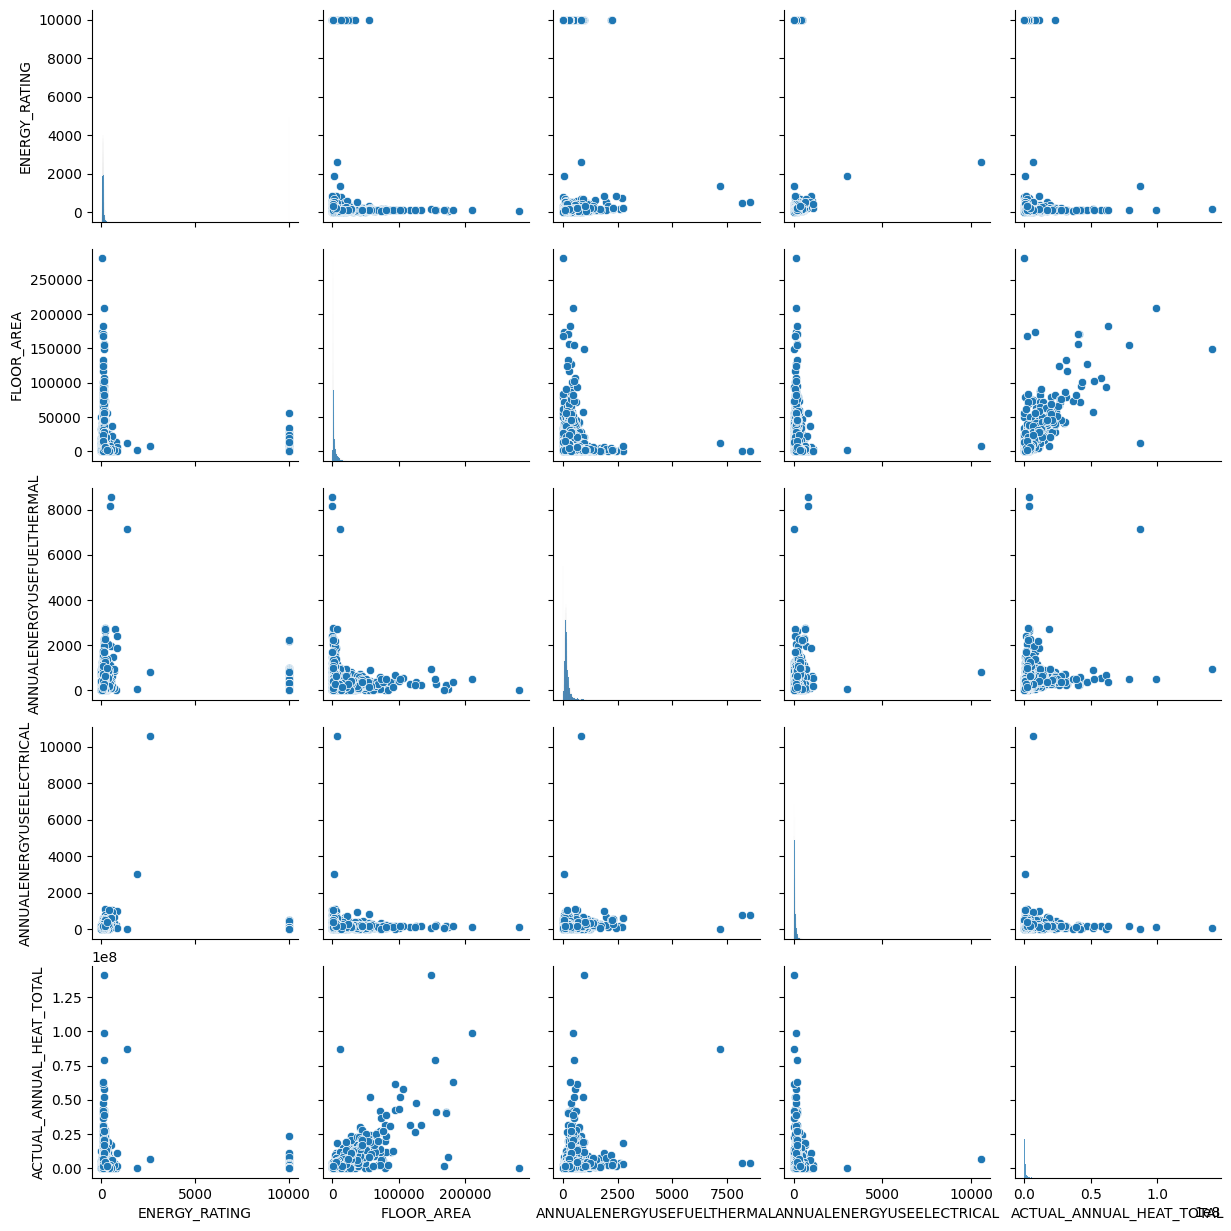

In [ ]:
import seaborn as sns
#MAKE SCATTER PLOT TO SEE COVARIANCE
sns.pairplot(X_numeric)

We can see positive linear correlation btw:

*   Floor_Area and Actual_annaul_heat_total




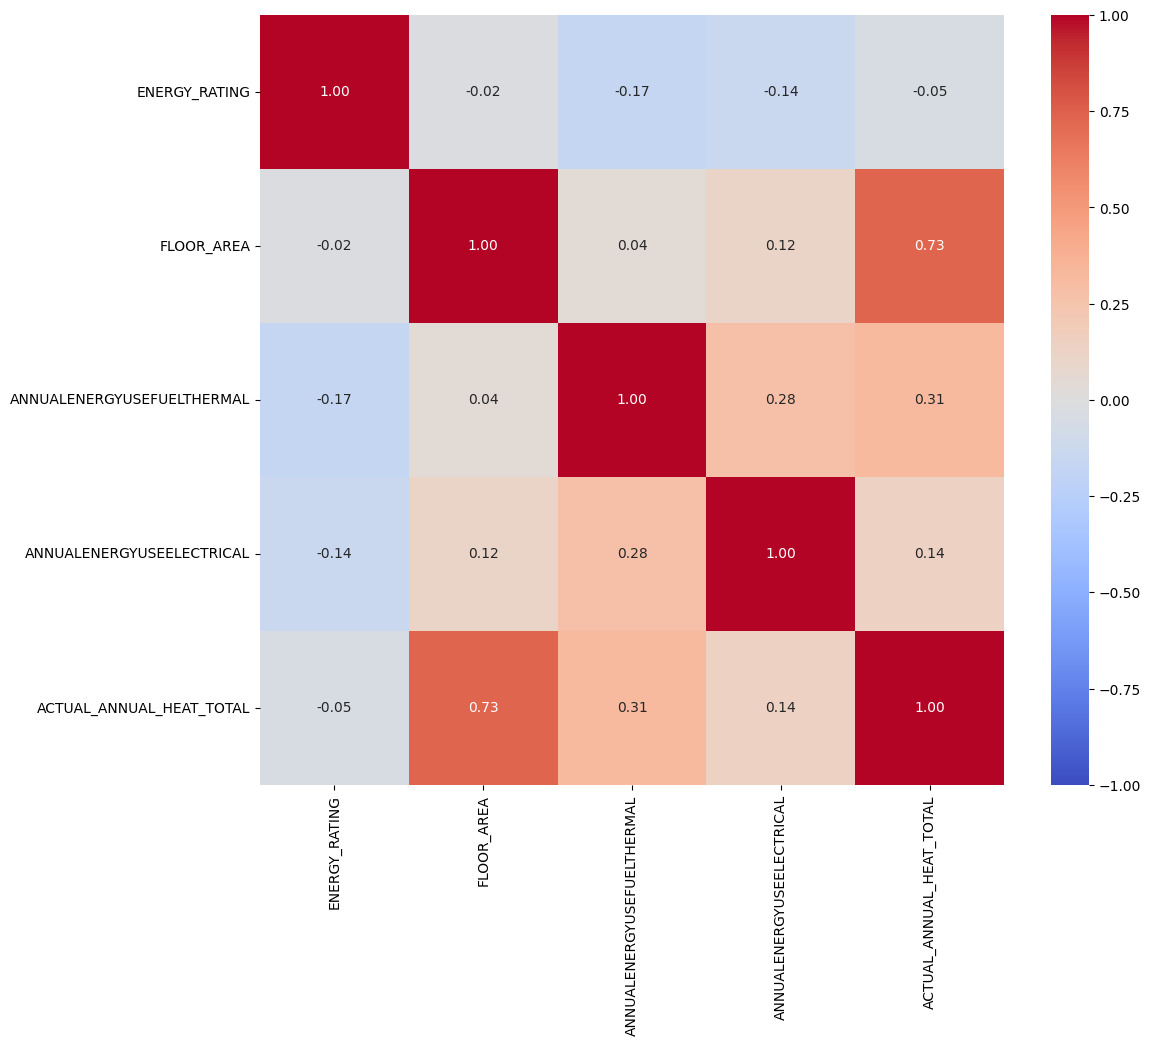

In [ ]:
# Compute the correlation matrix of the numeric data
corr_matrix = X_numeric.corr()

# Set a threshold for considering variables to be collinear (e.g., above 0.9)
threshold = 0.9

# Find highly correlated pairs of variables (excluding self-correlations)
collinear_pairs = np.where(np.abs(corr_matrix) > threshold)
collinear_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*collinear_pairs) if x != y]

# Print the collinear variable pairs
for pair in collinear_pairs:
    print(f"Collinear variables: {pair[0]} and {pair[1]}")

# Optionally, visualize the correlation matrix to spot collinear variables
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1)
plt.show()

From the given correlation matrix, we can observe the following:

Strong Positive Correlations:
FLOOR_AREA and ACTUAL_ANNUAL_HEAT_TOTAL have a strong positive correlation of 0.73. This suggests that larger floor areas tend to have higher annual heat consumption.
FLOOR_AREA and ACTUAL_ANNUAL_ELEC_TOTAL also show a strong positive correlation of 0.76, indicating that larger floor areas are associated with higher electricity consumption.


In [ ]:
# note: recheck missing values
# this is important: after I apply the log function to some variables cause log(0) = -infinity
print("there are {} missing or infinity values in the numerical data".format(X_numeric.isnull().sum().sum()))

there are 0 missing or infinity values in the numerical data


In [ ]:
#logarthm columns
london['FLOOR_AREA']= np.log10(london['FLOOR_AREA'])
london['ACTUAL_ANNUAL_HEAT_TOTAL']= np.log10(london['ACTUAL_ANNUAL_HEAT_TOTAL'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
london. head ()

,ENERGY_RATING_BAND,ENERGY_RATING,MAIN_HEATING_FUEL,BUILDING_ENVIRONMENT,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL
0,D,89,Natural Gas,Heating and Mechanical Ventilation,3.093772,113,106,5.146850,131546.0
1,E,102,Natural Gas,Heating and Natural Ventilation,3.400020,178,75,5.650440,188400.0
2,D,77,Natural Gas,Heating and Natural Ventilation,3.191730,195,47,5.481765,73085.0
3,F,143,Natural Gas,Heating and Natural Ventilation,3.114878,225,53,5.467060,69048.4
4,G,9999,Natural Gas,Mixed-mode with Mechanical Ventilation,3.589287,0,0,-inf,0.0


In [ ]:
X_numeric.head ()

,ENERGY_RATING,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL
0,89,1241.00,113,106,140233.0
1,102,2512.00,178,75,447136.0
2,77,1555.00,195,47,303225.0
3,143,1302.80,225,53,293130.0
4,9999,3884.07,0,0,0.0


In [ ]:
print("number of infinite values:", (np.isinf(X_numeric)).sum().sum())

number of infinite values: 0


In [ ]:
# this has to return 0 now
X_numeric.replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(X_numeric)).sum().sum())

number of infinite values: 0


In [ ]:
print("the numerical data contains (rows, columns) = ", X_numeric.shape)
print("there are {} missing values in the numerical data".format(X_numeric.isnull().sum().sum()))

the numerical data contains (rows, columns) =  (25118, 5)
there are 0 missing values in the numerical data


In [ ]:
#use the nearest neighbour to fill in missing data
from sklearn.impute import KNNImputer

KNNImputer= KNNImputer(n_neighbors=5)
X_numerical_imputed= KNNImputer.fit_transform(X_numeric)
X_numerical_imputed

array([[8.900000e+01, 1.241000e+03, 1.130000e+02, 1.060000e+02,
        1.402330e+05],
       [1.020000e+02, 2.512000e+03, 1.780000e+02, 7.500000e+01,
        4.471360e+05],
       [7.700000e+01, 1.555000e+03, 1.950000e+02, 4.700000e+01,
        3.032250e+05],
       ...,
       [9.400000e+01, 1.481600e+04, 1.190000e+02, 1.640000e+02,
        1.763104e+06],
       [2.000000e+02, 6.655000e+03, 6.230000e+02, 1.900000e+02,
        4.146065e+06],
       [3.240000e+02, 1.807000e+03, 9.890000e+02, 3.640000e+02,
        1.787123e+06]])

In [ ]:
X_categorical. head ()

,ENERGY_RATING_BAND,MAIN_HEATING_FUEL,BUILDING_ENVIRONMENT
0,D,Natural Gas,Heating and Mechanical Ventilation
1,E,Natural Gas,Heating and Natural Ventilation
2,D,Natural Gas,Heating and Natural Ventilation
3,F,Natural Gas,Heating and Natural Ventilation
4,G,Natural Gas,Mixed-mode with Mechanical Ventilation


In [ ]:
X_categorical.describe ()

,ENERGY_RATING_BAND,MAIN_HEATING_FUEL,BUILDING_ENVIRONMENT
count,25118,25114,25118
unique,8,10,7
top,D,Natural Gas,Heating and Natural Ventilation
freq,8221,22133,18718


In [ ]:
#describe shape
london_ohe.shape

(25118, 25)

In [ ]:
#use one hot encode for categorical variables
london_ohe= pd.get_dummies(X_categorical)
london_ohe

,ENERGY_RATING_BAND_A,ENERGY_RATING_BAND_B,ENERGY_RATING_BAND_C,ENERGY_RATING_BAND_D,ENERGY_RATING_BAND_E,ENERGY_RATING_BAND_F,ENERGY_RATING_BAND_G,ENERGY_RATING_BAND_INVALID!,MAIN_HEATING_FUEL_Anthracite,MAIN_HEATING_FUEL_Biogas,...,MAIN_HEATING_FUEL_Natural Gas,MAIN_HEATING_FUEL_Oil,MAIN_HEATING_FUEL_Other,BUILDING_ENVIRONMENT_Air Conditioning,BUILDING_ENVIRONMENT_Heating and Mechanical Ventilation,BUILDING_ENVIRONMENT_Heating and Natural Ventilation,BUILDING_ENVIRONMENT_Mechanical Ventilation Only,BUILDING_ENVIRONMENT_Mixed-mode with Mechanical Ventilation,BUILDING_ENVIRONMENT_Mixed-mode with Natural Ventilation,BUILDING_ENVIRONMENT_Natural Ventilation Only
0,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25113,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
25114,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
25115,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
25116,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
X_numerical_imputed.shape

(25118, 5)

In [ ]:
london_ohe

,ENERGY_RATING_BAND_A,ENERGY_RATING_BAND_B,ENERGY_RATING_BAND_C,ENERGY_RATING_BAND_D,ENERGY_RATING_BAND_E,ENERGY_RATING_BAND_F,ENERGY_RATING_BAND_G,ENERGY_RATING_BAND_INVALID!,MAIN_HEATING_FUEL_Anthracite,MAIN_HEATING_FUEL_Biogas,...,MAIN_HEATING_FUEL_Natural Gas,MAIN_HEATING_FUEL_Oil,MAIN_HEATING_FUEL_Other,BUILDING_ENVIRONMENT_Air Conditioning,BUILDING_ENVIRONMENT_Heating and Mechanical Ventilation,BUILDING_ENVIRONMENT_Heating and Natural Ventilation,BUILDING_ENVIRONMENT_Mechanical Ventilation Only,BUILDING_ENVIRONMENT_Mixed-mode with Mechanical Ventilation,BUILDING_ENVIRONMENT_Mixed-mode with Natural Ventilation,BUILDING_ENVIRONMENT_Natural Ventilation Only
0,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25113,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
25114,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
25115,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
25116,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
#combine dataframe
Xcom = np.hstack([X_numerical_imputed, london_ohe])
Xcom.shape

(25118, 30)

In [ ]:
# make a train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xcom, y, test_size=0.2, random_state=42)

In [ ]:
print("The dataset has {} features (!!!)".format(Xcom.shape[1]))

The dataset has 30 features (!!!)


In [ ]:
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (20094, 30) (20094,)
Test set size: (5024, 30) (5024,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [ ]:
# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1616835746693.4211
R-squared: 0.34531400034905047


the MSE is quite high (161), suggesting substantial differences between your model's predictions and the actual values in your test dataset. R2 score is 0.34, which implies that your model explains approximately 34% of the variability in energy consumption in the London data.

In [ ]:
print ("the model test accuracy is {:.2}".format(rf.score(X_test, y_test)))

the model test accuracy is 0.35


In [ ]:
#this is how you see the importance of the features
rf.feature_importances_[:10]

array([0.01441918, 0.91191513, 0.        , 0.07246147, 0.00120421,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
#show features name
feature_names = X_numeric.columns.tolist()
print(feature_names)

['ENERGY_RATING', 'FLOOR_AREA', 'ANNUALENERGYUSEFUELTHERMAL', 'ANNUALENERGYUSEELECTRICAL', 'ACTUAL_ANNUAL_HEAT_TOTAL']


In [ ]:
feature_names = 'ENERGY_RATING', 'FLOOR_AREA', 'ANNUALENERGYUSEFUELTHERMAL', 'ANNUALENERGYUSEELECTRICAL', 'ACTUAL_ANNUAL_HEAT_TOTAL'
len(feature_names)

5

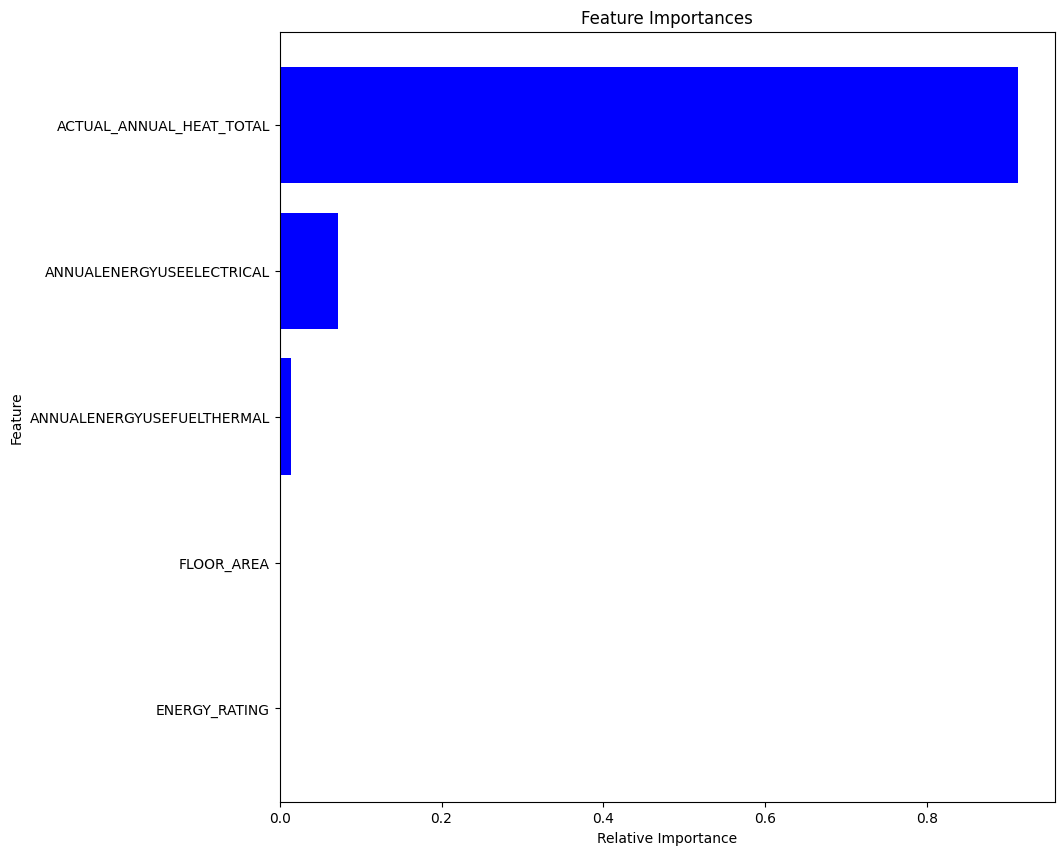

In [ ]:
# Replace with your actual feature names list:
feature_names = ['ENERGY_RATING', 'FLOOR_AREA', 'ANNUALENERGYUSEFUELTHERMAL', 'ANNUALENERGYUSEELECTRICAL', 'ACTUAL_ANNUAL_HEAT_TOTAL']

# Use 'rf_regressor' instead of 'model' to access feature importances
importances = rf.feature_importances_

# Ensure indices are within the range of feature_names
indices = np.argsort(importances)[-len(feature_names):]  # Limit indices to the length of feature_names

# Get the number of features in your dataset
num_features = len(feature_names)

# Get the indices of the top features (up to the number of features in your dataset)
# using min to ensure we don't try to select more features than available
num_top_features = min(50, num_features)
indices = indices[-num_top_features:] # Getting the indices for top features within the available features


# Create a bar plot
plt.figure(figsize=(10, 10))

# Use num_top_features instead of 50 to match the number of features
plt.barh(range(num_top_features), importances[indices], color='b', align='center')

# Use feature_names with valid indices to avoid the error
plt.yticks(range(num_top_features), [feature_names[i] for i in range(len(indices))])

plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Dominant Feature:

ACTUAL_ANNUAL_HEAT_TOTAL is the most important feature, as indicated by the longest bar. This suggests that this feature has a significant impact on the model's predictions.
Other Important Features:

ANNUALENERGYUSEELECTRICAL and FLOOR_AREA also appear to be relatively important, though to a lesser extent than ACTUAL_ANNUAL_HEAT_TOTAL.
Less Important Features:

ANNUALENERGYUSEFUELTHERMAL and ENERGY_RATING have the least impact on the model's predictions.

# useful links and methods and functions I used:

```df.dropna()``` to remove observation with missing variables

```df.drop(columns, axis=1)``` to remove features (columns)


```np.log10()``` and ```np.isinf()``` to convert to log space and find infinite values  

`np.hstack([X1, X2])` to concatenate two arrays


one hot encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html and https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/


KNN imputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html , https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/, and
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/  